# 데이터 분석 프로세스 
1) 문제 정의 및 가설 설정하기 → 2) 데이터 분석 기본 세팅 하기 → 3) 데이터 분석하기 → 4) 분석 결과 시각화 하기 → 5) 최종 결론 내리기

# 데이터 분석 프로젝트 1차
여러분은 **이스트소프트 WASSUP 온라인 교육팀 신입사원**으로 일하게 되었습니다.

데이터 분석을 통해 팀장님이 주신 미션을 해결해볼까요?

* 팀장님 : ”지난 회의 중 나왔던 이야기들, 바로 진행할 수 있게 이사원이 데이터로 체크해 줄 수 있을까요?”   
 < 주어진 상황에 맞게 데이터로 검증하기 >

## 요구사항 분석
### 미션1) 최적의 타이밍에 완주를 독려하는 고객 관리 메세지를 보내볼까요?
**이스트소프트 WASSUP에서는 모든 수강생들이 완주 하는 것을 중요하게 생각합니다.**

완주를 위한 고객관리 메세지를 보낼 최적의 시간대를 찾고싶은데요,

수강생들의 접속 데이터를 살펴보면

무슨 요일, 시간대에 수강생들이 수업을 주로 듣는지가 나오겠군요!

동기 부여를 위한 관리 메세지의 최적의 시간대를 찾아봅시다! :)

> **목표 : 수강생들이 가장 많이 혹은 가장 적게 듣는 시간과 요일을 데이터 분석으로 찾기**

### 미션2) 수강 수요가 많은 지역을 찾아볼까요?
수강 수요가 많은 지역을 안다면, 보다 효율적인 광고 집행이 가능할 것 같아요!

어디서 수강생이 많이 모이는지 보고 그 지역의 특징을 분석해보면 좋을 것 같네요!

우선은 수강 수요가 많은 지역을 찾아봅시다

> 목표 **: 가장 수강을 많이 하는 지역을 데이터분석으로 찾기**

</aside>

## 미션1) 가장 적절한 고객 관리 타이밍은?
우리는 무슨 “요일”, “몇 시”에 수강생들이 강의를 듣는지 알아보아야 합니다

### 데이터 수집 및 로드
필요한 데이터 확인하기.   
“어떤" 수강생이 “언제” 주로 접속 하는지에 대해 알아보아야 하니, '접속 시간'과 '유저 ID' 만 있으면 되겠네요!   
여러분은 서버 개발팀에 요청하여 아래의 데이터를 추출 받을 수도 있고, 직접 조회 권한을 받아 SQL로 직접 추출할 수도 있습니다.
* access_detail.csv
```
`lecture_id (수강 강의 id)` 
`access_date (접속 시작 날짜 및 시간)` 
`user_id (유저 id)`
```

In [1]:
import pandas as pd

In [2]:
access_data = pd.read_table('data/access_detail.csv',sep=',')

### 데이터 살펴보기

In [3]:
access_data.head()

,lecture_id,access_date,user_id
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34,78ff837c7cea9f33
1,5f266927e67b8fcf4340c087,2020-08-04 11:56:07,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c087,2020-08-03 12:19:58,23182525e9996864
3,5f266927e67b8fcf4340c087,2020-08-08 15:15:16,ffb6913842d617a5
4,5f266927e67b8fcf4340c087,2020-08-04 10:30:59,2c6822e7e833dc95


In [4]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   lecture_id   8128 non-null   object
 1   access_date  8128 non-null   object
 2   user_id      8128 non-null   object
dtypes: object(3)
memory usage: 190.6+ KB


In [5]:
access_data.describe()

,lecture_id,access_date,user_id
count,8128,8128,8128
unique,77,7420,8128
top,5f266927e67b8fcf4340c087,2020-08-18 18:12:41,78ff837c7cea9f33
freq,157,112,1


다행히 결측치는 없네요.   
어라? 우리가 필요한 건 시간과  요일 정보인데,   
날짜와 시간이 합쳐져 있는 데이터밖에 없네요.   
접속 시간 날짜를 우리가 필요한 정보로 알맞게 가공 해야겠군요!

### 데이터 전처리

In [6]:
# step1) access_date 의 데이터 종류를 확인 해봅시다!
type(access_data['access_date'][0])

str

In [7]:
pd.to_datetime?

In [8]:
# step2) 우리가 원하는 시간의 데이터 형태로 변경하기

# format='%Y-%m-%dT%H:%M:%S.%f'
access_data['access_date_time'] = pd.to_datetime(access_data['access_date'], format='mixed')
# access_data['access_date_time'] = pd.to_datetime(access_data['access_date'], format=format)

print(type(access_data['access_date_time'][0]))
access_data.tail(5)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,lecture_id,access_date,user_id,access_date_time
8123,5f36558829f38171335a890a,2020-09-03 22:37:33,6da398d852411234,2020-09-03 22:37:33
8124,5f36558829f38171335a890a,2020-08-29 11:09:58,6da398d852411235,2020-08-29 11:09:58
8125,5f36558829f38171335a890a,2020-09-06 12:25:25,6da398d852411236,2020-09-06 12:25:25
8126,5f36558829f38171335a890a,2020-09-07 22:11:20,6da398d852411237,2020-09-07 22:11:20
8127,5f36558829f38171335a890a,2020-08-22 21:12:23,6da398d852411238,2020-08-22 21:12:23


In [11]:
# step3) 요일 추가하기
# [날짜 컬럼].dt.day_name 으로 해당 날짜의 요일을 가져오자
access_data['access_date_time_weekday'] = access_data['access_date_time'].dt.day_name()
access_data.tail(5)

,lecture_id,access_date,user_id,access_date_time,access_date_time_weekday
8123,5f36558829f38171335a890a,2020-09-03 22:37:33,6da398d852411234,2020-09-03 22:37:33,Thursday
8124,5f36558829f38171335a890a,2020-08-29 11:09:58,6da398d852411235,2020-08-29 11:09:58,Saturday
8125,5f36558829f38171335a890a,2020-09-06 12:25:25,6da398d852411236,2020-09-06 12:25:25,Sunday
8126,5f36558829f38171335a890a,2020-09-07 22:11:20,6da398d852411237,2020-09-07 22:11:20,Monday
8127,5f36558829f38171335a890a,2020-08-22 21:12:23,6da398d852411238,2020-08-22 21:12:23,Saturday


In [14]:
# step4) 요일 별 접속한 수강생 수 구하기
weekdata = access_data.groupby('access_date_time_weekday')['user_id'].count()
weekdata

access_date_time_weekday
Friday        859
Monday       1354
Saturday      926
Sunday       1541
Thursday      937
Tuesday      1624
Wednesday     887
Name: user_id, dtype: int64

In [15]:
# 요일 순서대로 정렬하기
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = weekdata.agg(weeks) #weeks의 리스트에 따라 재배열
weekdata

Monday       1354
Tuesday      1624
Wednesday     887
Thursday      937
Friday        859
Saturday      926
Sunday       1541
Name: user_id, dtype: int64

In [16]:
# step5) 시간 별 접속한 수강생 수 전처리 하기

access_data['access_date_time_hour'] = access_data['access_date_time'].dt.hour

hourdata = access_data.groupby('access_date_time_hour')['user_id'].count()
hourdata = hourdata.sort_index()
hourdata

access_date_time_hour
0      343
1      197
2      144
3      123
4       65
5       50
6       62
7       84
8      126
9      216
10     297
11     279
12     259
13     361
14     387
15     477
16     523
17     471
18    1115
19     445
20     517
21     581
22     580
23     426
Name: user_id, dtype: int64

### 데이터 시각화

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

<BarContainer object of 7 artists>

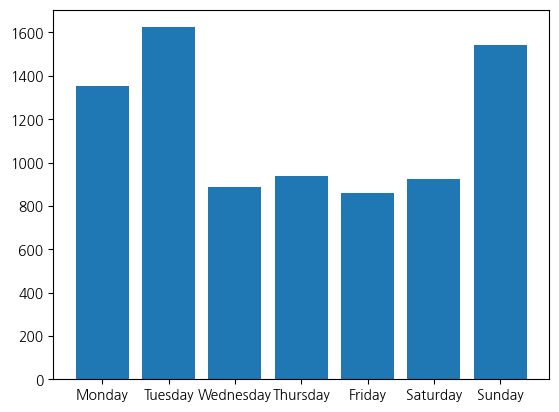

In [18]:
plt.bar(weekdata.index, weekdata.values)

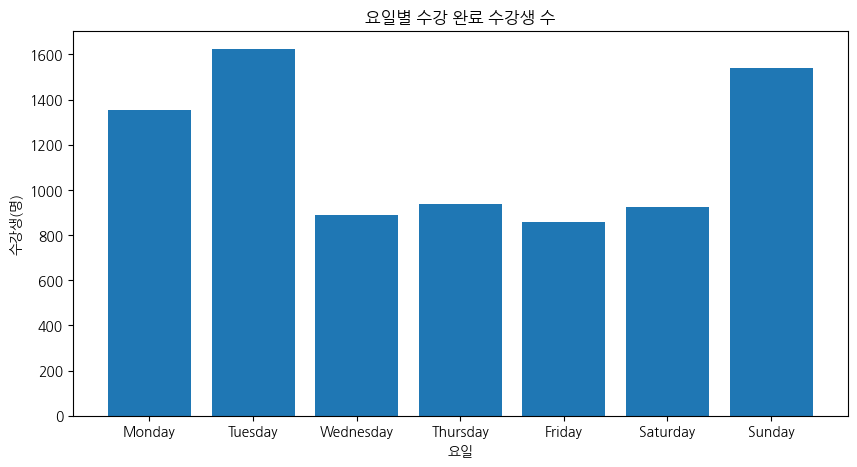

In [19]:
# 요일별 수강생 수  막대그래프 그리기

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(weekdata.index, weekdata.values)

#그래프 명
plt.title('요일별 수강 완료 수강생 수')

#그래프 x축 레이블
plt.xlabel('요일')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks()

#그래프 출력
plt.show()

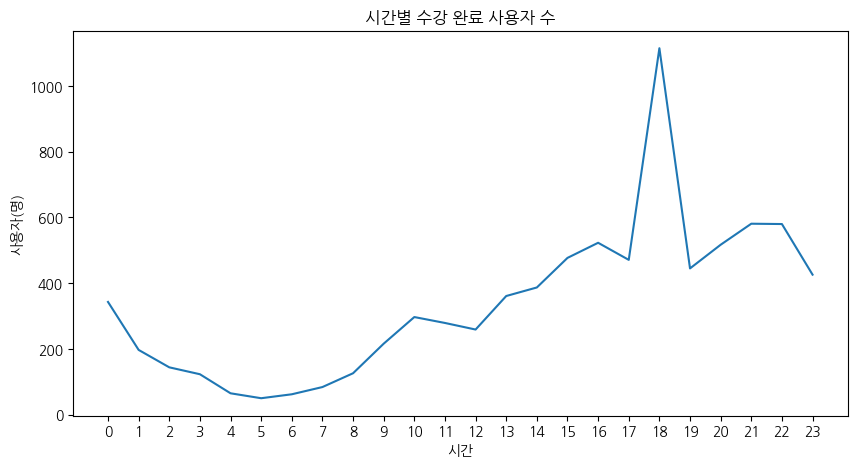

In [16]:
# 시간 별 접속 하는 수강생 수의 꺾은선 그래프 그리기

#그래프 사이즈 변경
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.plot(hourdata.index, hourdata.values)

#그래프 명
plt.title('시간별 수강 완료 사용자 수')

#그래프 x축 레이블
plt.xlabel('시간')

#그래프 y축 레이블
plt.ylabel('사용자(명)')

#x축 눈금 표시 하기
plt.xticks(np.arange(24))

#그래프 출력
plt.show()

In [20]:
# 요일 별 접속 시간 살펴보기 

#피벗테이블 만들기
est_data_pivot_table = pd.pivot_table(access_data, values='user_id',   #values : 열에 들어 가는 부분
                       index=['access_date_time_weekday'], #index : 행에 들어가는 부분
                       columns=['access_date_time_hour'],  
                       aggfunc="count").agg(weeks)  #aggfunc : 데이터 축약시 사용할 함수
est_data_pivot_table

access_date_time_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,67,31,30,27,3,5,19,14,28,22,...,62,55,101,84,68,86,119,117,118,86
Tuesday,51,27,17,12,6,3,6,14,20,26,...,41,56,68,34,713,56,66,97,92,86
Wednesday,47,19,12,8,10,15,14,3,22,20,...,34,68,40,68,80,71,56,75,82,52
Thursday,39,30,10,15,14,2,5,11,10,18,...,46,69,80,60,61,61,70,62,94,65
Friday,72,36,20,9,5,1,5,2,10,34,...,44,61,57,70,67,51,45,45,47,33
Saturday,31,17,10,22,7,4,4,19,9,51,...,72,78,66,82,55,26,47,70,52,37
Sunday,36,37,45,30,20,20,9,21,27,45,...,88,90,111,73,71,94,114,115,95,67


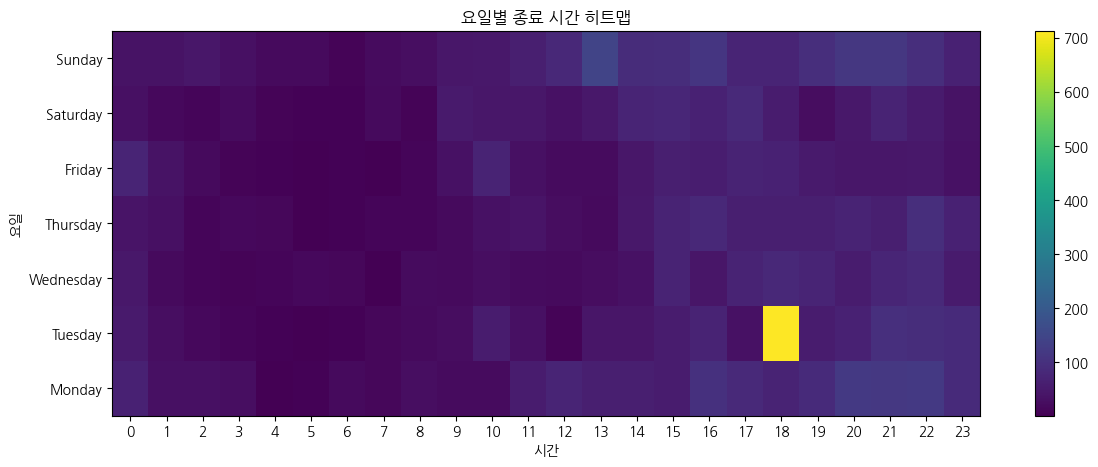

In [21]:
# 히트맵으로 나타내기
#그래프 사이즈 변경
plt.figure(figsize=(14,5))

#pcolor를 이용하여 heatmap 그리기
plt.pcolor(est_data_pivot_table)

#히트맵에서의 x축
plt.xticks(np.arange(0.5, len(est_data_pivot_table.columns), 1), est_data_pivot_table.columns)

#히트맵에서의 y축
plt.yticks(np.arange(0.5, len(est_data_pivot_table.index), 1), est_data_pivot_table.index)

#그래프 명
plt.title('요일별 종료 시간 히트맵')

#그래프 x축 레이블
plt.xlabel('시간')

#그래프 y축 레이블
plt.ylabel('요일')

#plt.colorbar() 명령어를 추가하면 그래프 옆에 숫자별 색상값을 나타내는 컬러바를 보여 줍니다
plt.colorbar()
plt.show()

### 분석 결론 및 보고
팀장님~ 
독려 메세지의 가장 적절한 타이밍을 찾기 위해 수강생들의 접속 일자 및 시간을 살펴보았는데요,

먼저 요일을 살펴보자면 아래 보시는 것과 같이,
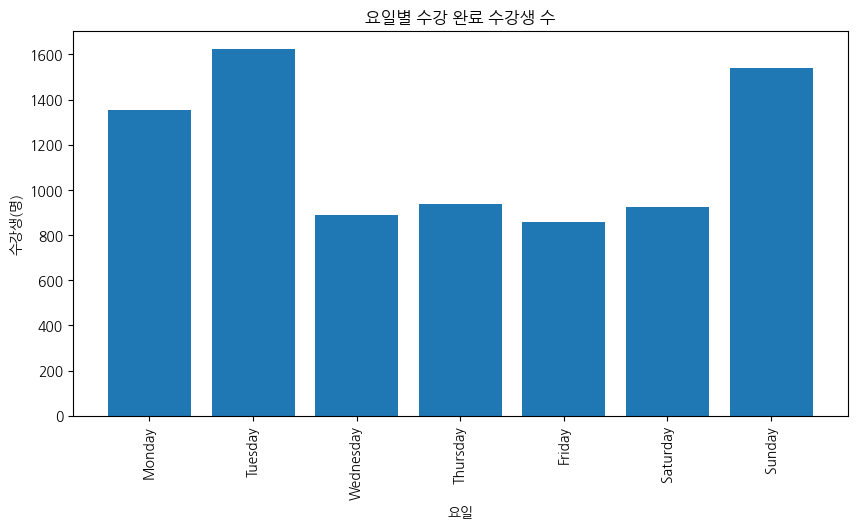
일주일 중 **“화요일”** 그리고 **“일요일”**에 수강이 많이 이뤄졌고,

**“금요일”** 과 **“수요일”**에 수강 하는 인원이 가장 적었습니다.

이어서, 
일별 접속 시간의 추이를 살펴보았는데요~
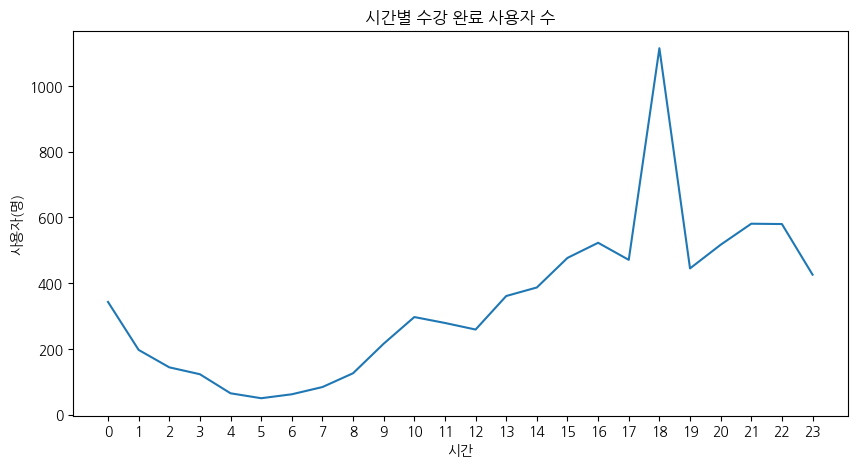

저녁시간 쯤인 **18시대에** 접속이 폭발적으로 많았고, 

밤 21시쯤에 감소하는 추세를 보였습니다.

요일 별, 시간대별로도 살펴보았더니 역시

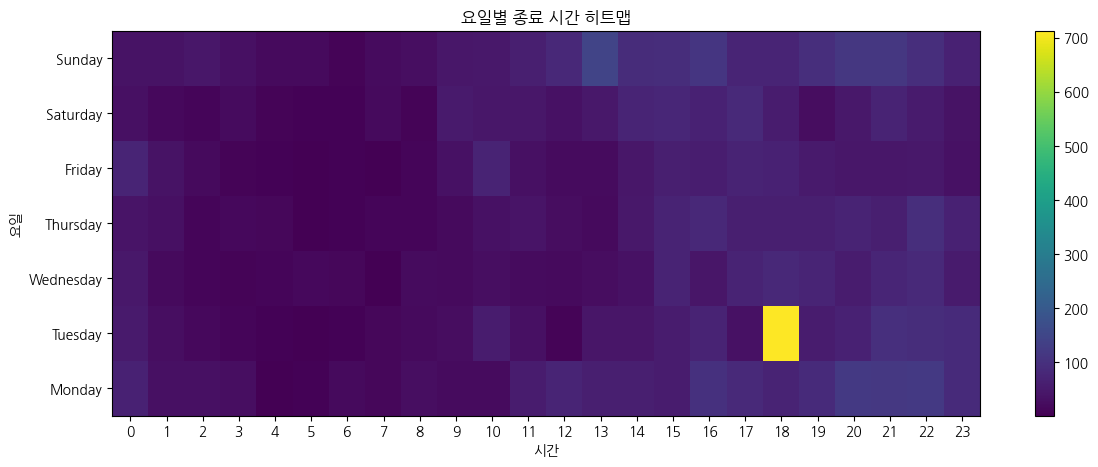

화요일 18시에 가장 많은 접속자가 있다는 것을 확인할 수 있었습니다.

그리하여,
```
고객 관리 문자는 

가장 수강을 많이 한 `화요일, 일요일 저녁시간`쯤에 독려 문자를

가장 수강을 적게 한 `금요일, 수요일 오전`시간에 동기부여 문자를 보내보는 것이 효과적일 것으로 보입니다.
```

## 미션2) 제품 수요가 많은 지역을 찾아라!
“수강 수요가 많은 지역을 안다면, 보다 효율적인 광고 집행이 가능할 것 같아요!

어디서 수강생이 많이 모이는지 보고 그 지역의 특징을 분석해보면 좋을 것 같습니다!”
> 목표 : 가장 수강을 많이 하는 지역을 데이터분석으로 찾기

### 데이터 로드 및 살펴보기
우선 어느 지역에서 수강신청이 많은지 살펴보아야겠죠?
이를 위해서는 **수업을 신청한 수강생 수**를 **지역별**로 나누는 전처리가 필요 합니다.

* students_area_detail.csv
```
`lecture_id: 수강 강의 id`
`area: 접속 지역`
`latitude: 해당 지역 위도`
`longitude: 해당 지역 경도` 
`user_id: 유저 id`
```

In [22]:
import pandas as pd
area_data = pd.read_table('data/students_area_detail.csv',sep=',')
area_data.head()

,lecture_id,area,latitude,longitude,user_id
0,5f2cfa581c0c783e4e825379,부산,35.179554,129.075642,78ff837c7cea9f33
1,5f35370cf9b9ed3dee7f1b73,대전,36.348315,127.390594,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c1464,서울,37.487935,126.857758,23182525e9996864
3,5f35370cf9b9ed3dee7f1b6a,부산,35.179554,129.075642,ffb6913842d617a5
4,5f266927e67b8fcf4340c1705,서울,37.487935,126.857758,2c6822e7e833dc95


In [23]:
area_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lecture_id  10605 non-null  object 
 1   area        10605 non-null  object 
 2   latitude    10605 non-null  float64
 3   longitude   10605 non-null  float64
 4   user_id     10605 non-null  object 
dtypes: float64(2), object(3)
memory usage: 414.4+ KB


In [24]:
area_data.describe()

,latitude,longitude
count,10605.000000,10605.000000
mean,36.828465,127.300652
std,1.007433,0.763835
min,33.499621,126.531188
25%,36.348315,126.857758
50%,37.487935,126.857758
75%,37.487935,127.390594
max,37.885693,129.247284


In [25]:
area_data.describe(include='all')

,lecture_id,area,latitude,longitude,user_id
count,10605,10605,10605.000000,10605.000000,10605
unique,1887,12,NaN,NaN,10605
top,5f266927e67b8fcf4340c088,서울,NaN,NaN,78ff837c7cea9f33
freq,159,5296,NaN,NaN,1
mean,NaN,NaN,36.828465,127.300652,NaN
std,NaN,NaN,1.007433,0.763835,NaN
min,NaN,NaN,33.499621,126.531188,NaN
25%,NaN,NaN,36.348315,126.857758,NaN
50%,NaN,NaN,37.487935,126.857758,NaN
75%,NaN,NaN,37.487935,127.390594,NaN


* 여기에서 필요한 테이블은 무엇일까요?   
“어떤" 수강생이 “어디에서” 주로 접속 하는지 알아야 하니,   
접속지역, 해당지역 위도 및 경도, 유저아이디가 필요하겠군요!

### 데이터 전처리

In [23]:
area_data['area'].unique()

array(['부산', '대전', '서울', '전북', '광주', '경기', '강원', '세종', '경북', '경남', '충북',
       '제주'], dtype=object)

In [24]:
# 지역 분류 하기
category_range = set(area_data['area']) # 유니크한 지역정보
print(category_range, len(category_range))

{'대전', '경기', '부산', '전북', '세종', '서울', '경남', '경북', '충북', '강원', '제주', '광주'} 12


* 필요한 데이터만 볼 수 있게 가공하기   
우리는 “각 지역의 정보” 와, “그 지역의 수강생 수” 이 두 가지 정보만 필요합니다!

In [26]:
# (1) “접속지역, 해당 지역 위도, 해당 지역 경도” 만으로 이루어진 테이블 만들기
#새로운 테이블을 만들고자 할 땐 기존의 테이블에서 필요한 "열의 이름"을 대괄호에 넣어 변수에 지정해 주면 됩니다
area_info = area_data[['area','latitude','longitude']]

#잘 만들어졌는지 초기 5개의 데이터 확인하기
area_info.head()

,area,latitude,longitude
0,부산,35.179554,129.075642
1,대전,36.348315,127.390594
2,서울,37.487935,126.857758
3,부산,35.179554,129.075642
4,서울,37.487935,126.857758


In [27]:
# (2) 수많은 중복 정보 삭제 하기 
# step1) 중복되는 테이블의 정보를 삭제 시켜봅시다!
#drop_duplicates()을 이용하면, area(지역) 컬럼의 중복 데이터를 처리 할 수 있습니다. :)

area_info=area_info.drop_duplicates(['area'])
area_info

,area,latitude,longitude
0,부산,35.179554,129.075642
1,대전,36.348315,127.390594
2,서울,37.487935,126.857758
5,전북,35.574683,126.852264
11,광주,36.084621,126.951141
13,경기,37.546755,127.203827
36,강원,37.531510,129.000000
41,세종,36.560000,127.278000
53,경북,36.129002,128.343658
59,경남,35.556809,129.247284


In [28]:
#.reset_index()를 이용해, 인덱스를 재정렬 할 수 있어요!
area_info= area_info.reset_index()
area_info

,index,area,latitude,longitude
0,0,부산,35.179554,129.075642
1,1,대전,36.348315,127.390594
2,2,서울,37.487935,126.857758
3,5,전북,35.574683,126.852264
4,11,광주,36.084621,126.951141
5,13,경기,37.546755,127.203827
6,36,강원,37.531510,129.000000
7,41,세종,36.560000,127.278000
8,53,경북,36.129002,128.343658
9,59,경남,35.556809,129.247284


In [29]:
# (3) 가공된 테이블인 “지역의 이름”을 기준으로 데이터를 정렬하기!
area_info = area_info.sort_values(by="area", ascending=True)
area_info

,index,area,latitude,longitude
6,36,강원,37.531510,129.000000
5,13,경기,37.546755,127.203827
9,59,경남,35.556809,129.247284
8,53,경북,36.129002,128.343658
4,11,광주,36.084621,126.951141
1,1,대전,36.348315,127.390594
0,0,부산,35.179554,129.075642
2,2,서울,37.487935,126.857758
7,41,세종,36.560000,127.278000
3,5,전북,35.574683,126.852264


In [30]:
# (4) 각 지역별 총 학생수 구하기
number_of_students = pd.DataFrame(area_data.groupby('area')['user_id'].count())
number_of_students

,user_id
area,
강원,261
경기,804
경남,79
경북,85
광주,565
대전,1238
부산,1162
서울,5296
세종,446


In [31]:
# (5) 지역별 총 학생수를 기존 테이블과 합치기
#merge()를 이용하여, 두 테이블을 병합 할수 있어요 :)!
result = pd.merge(area_info, number_of_students, on="area")
result

,index,area,latitude,longitude,user_id
0,36,강원,37.531510,129.000000,261
1,13,경기,37.546755,127.203827,804
2,59,경남,35.556809,129.247284,79
3,53,경북,36.129002,128.343658,85
4,11,광주,36.084621,126.951141,565
5,1,대전,36.348315,127.390594,1238
6,0,부산,35.179554,129.075642,1162
7,2,서울,37.487935,126.857758,5296
8,41,세종,36.560000,127.278000,446
9,5,전북,35.574683,126.852264,160


### 데이터 시각화

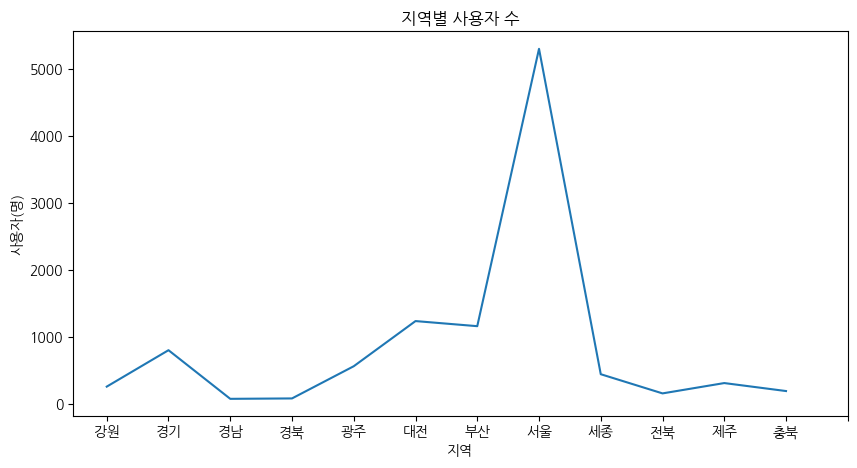

In [32]:
# 지역별 수강생 수 라인 그래프 그리기

#그래프 사이즈 변경
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.plot(result['area'], result['user_id'])

#그래프 명
plt.title('지역별 사용자 수')

#그래프 x축 레이블
plt.xlabel('지역')

#그래프 y축 레이블
plt.ylabel('사용자(명)')

#x축 눈금 수
plt.xticks(np.arange(13))

#그래프 출력
plt.show()

In [33]:
# 필요한 라이브러리 사용 선언하기
import folium
from folium.plugins import MarkerCluster

In [34]:
# (1) 대한민국 위도 경도 설정 하기 (대전광역시 : 36.3398175, 127.3940486)
m = folium.Map(location=[36.3398175, 127.3940486], zoom_start=7) 
m

In [35]:
# (2) 가공한 데이터를 반복문 으로 읽어서 지도에 찍어주기
for n in result.index:
  radius = result.loc[n,'user_id']
	#loc[n,"열 이름"]  => loc[]를 활용하여 n번째의 열을 조회 할수 있습니다!
	#즉, n번(지역)의 user의 수를 가져 올수 있는 것이죠!
  folium.CircleMarker([result['latitude'][n], result['longitude'][n]],
                        radius = radius/50, fill=True).add_to(m)
	#.add_to(m)를 활용하여, 지정해 두었던 우리나라의 지도를 가져올 수 있습니다!
m

### 분석 결론 도출
**팀장님! 가장 수강을 많이 하는 지역을 데이터분석으로 찾아보았습니다.**   
`서울 지역`에서 수강생의 숫자가 가장 많았고,   
다음으로는 대전, 부산 지역 순으로 수강생이 많이 분포한 것을 알 수 있습니다!
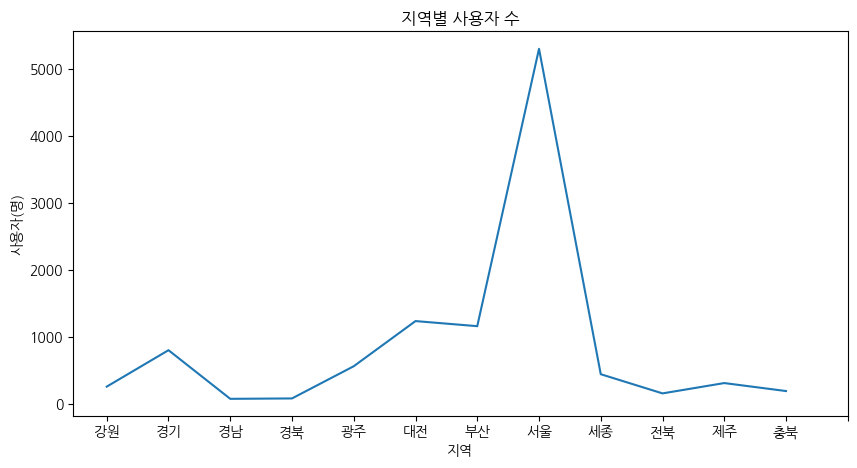
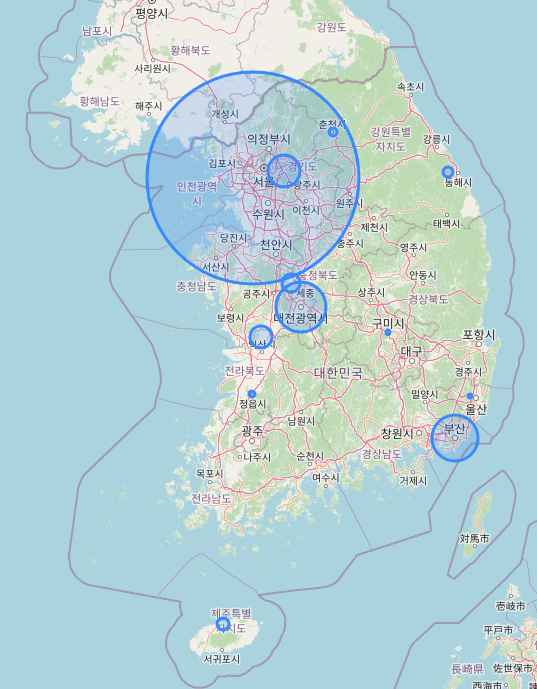
추가적으로, 같은 방법으로 서울지역 세부 분석 진행하여 

차주 안으로 세부 데이터 분석 결과를 전달 드리겠습니다! :)


## Quiz : 최적의 질의응답 시간대를 찾아라!
이스트소프트 WASSUP은
멘토님들이 실시간으로 질문에 답변을 해주는 “질의응답”을 운영하고 있습니다.

우리는 수강생의 질의응답의 수요가 많은 요일을 알아내서

멘토님의 수를 요일에 따라 적절히 배치하고 싶은데요.

질의응답은 궁금한 점을 멘토님께 질문하고 답을 얻는 시간이기 때문에, 

많은 수강생들의 수강이 완료되는 시점을 아는 것이 중요합니다!

팀장님께서 

**“수강생들의 수업 완료 시간대는 주로 한가한 주말일 것이다”** 라는 가설을 세웠습니다.

이 가설을 증명을 해봅시다.

### 데이터 로드 및 살펴보기

In [35]:
#Pandas 사용 선언하기
import pandas as pd

#데이터 불러오기
done_data = pd.read_table('data/done_detail.csv',sep=',')

In [36]:
done_data.head()

,lecture_id,done_date,user_id
0,5f266927e67b8fcf4340c08e,2020-08-07 12:02:16,78ff837c7cea9f33
1,5f266927e67b8fcf4340c08b,2020-08-08 1:14:59,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c090,2020-08-17 17:10:49,23182525e9996864
3,5f35370cf9b9ed3dee7f1b72,2020-08-30 23:42:58,ffb6913842d617a5
4,5f35370cf9b9ed3dee7f1b6e,2020-08-25 16:56:15,2c6822e7e833dc95


In [37]:
done_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  8128 non-null   object
 1   done_date   8128 non-null   object
 2   user_id     8128 non-null   object
dtypes: object(3)
memory usage: 190.6+ KB


In [38]:
done_data.describe()

,lecture_id,done_date,user_id
count,8128,8128,8128
unique,77,7420,8128
top,5f266927e67b8fcf4340c087,2020-08-18 18:12:41,78ff837c7cea9f33
freq,157,112,1


### 데이터 전처리

In [39]:
# 시간 데이터 전처리
done_data['done_date_time'] = pd.to_datetime(done_data['done_date'], format='mixed')
done_data.tail(5)

,lecture_id,done_date,user_id,done_date_time
8123,5f2786faa76ce73f7c0a949b,2020-08-06 0:06:13,6da398d852411234,2020-08-06 00:06:13
8124,5f36558829f38171335a88fc,2020-08-30 0:17:10,6da398d852411235,2020-08-30 00:17:10
8125,5f2786faa76ce73f7c0a9498,2020-08-15 23:11:47,6da398d852411236,2020-08-15 23:11:47
8126,5f2786faa76ce73f7c0a9495,2020-08-15 21:35:33,6da398d852411237,2020-08-15 21:35:33
8127,5f266927e67b8fcf4340c08b,2020-08-18 18:12:39,6da398d852411238,2020-08-18 18:12:39


In [40]:
# 요일 추가하기
done_data['done_date_time_weekday'] = done_data['done_date_time'].dt.day_name()
done_data.tail(5)

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday
8123,5f2786faa76ce73f7c0a949b,2020-08-06 0:06:13,6da398d852411234,2020-08-06 00:06:13,Thursday
8124,5f36558829f38171335a88fc,2020-08-30 0:17:10,6da398d852411235,2020-08-30 00:17:10,Sunday
8125,5f2786faa76ce73f7c0a9498,2020-08-15 23:11:47,6da398d852411236,2020-08-15 23:11:47,Saturday
8126,5f2786faa76ce73f7c0a9495,2020-08-15 21:35:33,6da398d852411237,2020-08-15 21:35:33,Saturday
8127,5f266927e67b8fcf4340c08b,2020-08-18 18:12:39,6da398d852411238,2020-08-18 18:12:39,Tuesday


In [41]:
#요일 별 수강완료 수강생 수 전처리 하기
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = done_data.groupby('done_date_time_weekday')['user_id'].count()
weekdata = weekdata.agg(weeks)
weekdata

Monday       1354
Tuesday      1624
Wednesday     887
Thursday      937
Friday        859
Saturday      926
Sunday       1541
Name: user_id, dtype: int64

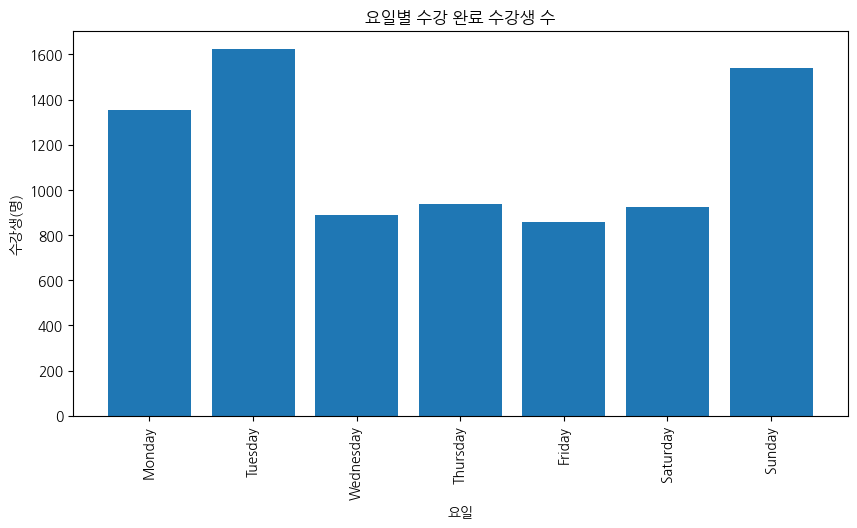

In [42]:
#요일 별 수강완료 수강생 수 라인 그래프 그리기
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(weekdata.index, weekdata.values)

#그래프 명
plt.title('요일별 수강 완료 수강생 수')

#그래프 x축 레이블
plt.xlabel('요일')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을 90도로 변환 
plt.xticks(rotation=90)

#그래프 출력
plt.show()

### 분석 결론 도출
많은 수강생들이 수강 완료하는 시점을 알기 위해,

요일별 수강 완료 수강생 수에 대한 데이터 분석을 진행 하였습니다.

분석한 결과는, 위 그래프를 보시는 것과 같이

요일 별 수강 완료 수강생은 주말이 아니라, 평일 “**화요일**”에 가장 많았고, 

그 다음은 “일요일”이 가장 많았습니다.

따라서 **“수요일” 과 "월요일”에 가장 많은 멘토님들의 추가 배치가 필요 할 것 같네요!**

# 데이터 분석 프로젝트 2차
지금까지는 주어진 상황에 맞게 데이터로 검증을 하는 연습을 했다면   
이번주부터는 한걸음 더 나아가서 직접 가설을 세워보고 그걸 검증하는 연습을 해볼거예요!

## 문제 정의
**이스트 팀장**

“다른 강의에 비해, '인공지능 서비스기획' 강좌의 구매 전환률이 안정적이지 않습니다.

이번 달은 AI기획 강좌 수강생 유입에 집중하여서 액션 플랜을 짜봅시다! “

> 구매전환률을 높여라! 라는 큰 미션이 주어졌어요!   
> 여러 방면에서 가설을 직접 세워보고, 데이터로 분석하여 팀장님을 설득해봅시다-!

##  배경 확인 및 가설 세우기
* [상황]
- 문제 파악 :
    
    **AI기획강좌**의 전체 광고 효율을 살펴보았는데
    
    회사에서 사용한 광고 비용에 비해 매출까지의 효율이 나타나지 않고 있습니다.
    
- 원하는 결과 :
    
    가장 효율이 나지 않는 광고 매체를 찾아서 **예산을 줄이고 다른 매체에 예산을 늘려**, 같은 비용 대비 광고 효율을 높이고 싶습니다. 
---
### 좋은 가설이란?
1) 풀고자 하는 문제의 방향성과 일치하는 가설

2) 테스트 가능한 가설 

3) 액션으로 이어질 수 있는 가설
---
- **문제 해결을 위해 세운 가설 확인하기**
    
    여러 광고 매체 중 광고 효율이 낮은 매체에 사용한 비용을 **가장 효율이 좋은 매체**에 집행한다면 **기존 대비 50%** 의 광고효율을 증대시킬 수 있을 것이다.
- 그럼 데이터분석은 무얼 먼저 해보아야 할까요?
    
    일단은 어떤 광고가 효율이 좋고 나쁜지 데이터를 통해 확인해봐야겠군요!
> 계산의 편의를 위해, 모든 광고 매체에 같은 비용을 쓰고 있다고 가정한다.

## 데이터 수집
* user_db.csv
* user_registered_class.csv
* user_db_app.csv
* user_db_ai.csv

## 데이터 로드 및 살펴보기
* user_db.csv
```
`user_id`: 회원 고유 아이디

`gender`: 성별

`age`: 나이대 

`access_media`: 수업 신청 경로

`group`:  할인 받은 여부

`discounted`: 할인의 종류
```

In [36]:
import pandas as pd
user_data = pd.read_csv('data/user_db.csv')

In [37]:
#표의 상단 5개 데이터 읽기
user_data.head()

#표의 마지막 5개의 정보를 보려면, tail()이라는 것도 이용할 수 있어요! 
user_data.tail()

,user_id,gender,area,age,access_media,group,discounted
8123,6da398d852411234,여,은평구,30,지인추천,0,NaN
8124,6da398d852411235,남,강서구,30,검색,0,NaN
8125,6da398d852411236,여,용산구,20,인스타그램,0,NaN
8126,6da398d852411237,남,광진구,30,네이버,0,NaN
8127,6da398d852411238,여,도봉구,20,인스타그램,0,NaN


가설을 검증하기 위해 우리가 알아야 할것은,
* "수업 신청 경로 별 수강생의 인원"
-> user_id와 access_media를 보면 되겠다.

## 데이터 전처리

In [45]:
user_data.describe()

,age,group,discounted
count,8128.000000,8128.000000,5654.000000
mean,24.212598,0.695620,24333.215423
std,8.626341,0.460173,7290.153174
min,10.000000,0.000000,10000.000000
25%,20.000000,0.000000,20000.000000
50%,20.000000,1.000000,30000.000000
75%,30.000000,1.000000,30000.000000
max,50.000000,1.000000,30000.000000


In [46]:
# 결측치 체크
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       8128 non-null   object 
 1   gender        8128 non-null   object 
 2   area          8128 non-null   object 
 3   age           8128 non-null   int64  
 4   access_media  8128 non-null   object 
 5   group         8128 non-null   int64  
 6   discounted    5654 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 444.6+ KB


In [47]:
# 결측치 확인하기
user_data.isnull().sum()

user_id            0
gender             0
area               0
age                0
access_media       0
group              0
discounted      2474
dtype: int64

In [48]:
# 결측치 제거하기(주의)
user_data = user_data.dropna() # 빈데이터가 존재하는 행 제거
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5654 entries, 0 to 5653
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       5654 non-null   object 
 1   gender        5654 non-null   object 
 2   area          5654 non-null   object 
 3   age           5654 non-null   int64  
 4   access_media  5654 non-null   object 
 5   group         5654 non-null   int64  
 6   discounted    5654 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 353.4+ KB


## 데이터 탐색 및 시각화
유입된 광고 매체에 따라 수강생의 수의 합계를 구할 필요 있겠죠?   
“유입 경로 별” 학생 수를 구하려면 어떤 메서드를 쓰는게 좋을까요?   
유입 광고 매체 “별”로 수강생 수를 구해야하니까 grouby와 count()를 이용하면 좋겠군요!

In [38]:
#수업 신청 경로 기준 수강생수 
access_media = user_data.groupby('access_media')['user_id'].count()
access_media

access_media
검색          812
네이버        1232
에브리타임       814
오프라인 광고     379
인스타그램      2444
지인추천        816
페이스북       1631
Name: user_id, dtype: int64

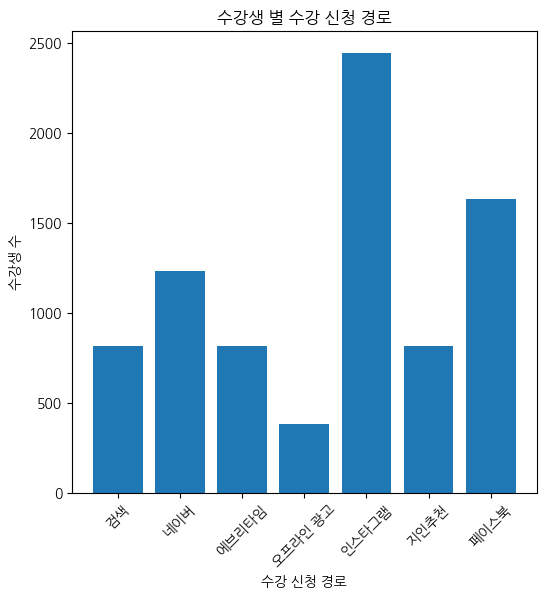

In [39]:
# 바그래프 그리기 

#plt.figure(width, height) 
plt.figure(figsize=(6,6))

#각각 어떤 값이 들어가야 하는지 입력해 볼까요?
#plt.bar(X축값, Y축값)
plt.bar(access_media.index , access_media.values)
# plt.bar(access_media.index, access_media.values, color = ['gold', 'b', '#FF0000', 'green','orange','red','#000000'], alpha = 0.3)

#그래프의 제목
plt.title('수강생 별 수강 신청 경로')

#그래프의 x축 라벨 이름
plt.xlabel('수강 신청 경로')

#그래프의 y축 라벨 이름
plt.ylabel('수강생 수')

#x축 눈금의 글씨의 각도 변경을 위해 plt.xticks(rotation="원하는 각도")를 이용해요!
#x축 눈금의 글씨를 45도 회전
plt.xticks(rotation=45)

#그래프를 화면에 나타나도록 합니다.
plt.show()

## 분석 결론 도출
 >  광고 효율이 나지 않는 매체를 찾아라!
 
 **팀장님! AI기획강좌의 광고 효율 최적화를 고민해보았는데요~**

여러 광고 매체 중 매출까지의 효율이 낮은 매체에 사용한 광고 비용을 

매출까지의 가장 효율이 좋은 광고 매체에 집행한다면 

기존 대비 50%의 매출 증대가 기대가 됩니다.

그래서 매채별 유입 인원을 측정해보았습니다!

데이터 분석 결과 (위 막대 그래프 참고)

**가장 효율이 나지 않는 광고는 옥외 광고임이 확인되었습니다.**

가장 효율이 나지 않는 광고는 옥외 광고로 

같은 금액을 모두 인스타그램에 집행한다면 기존 대비 최대 (2444-379) / 379 = 544%의 

광고 효율을 증대시킬 수 있는 것으로 확인되었습니다.

따라서, 

옥외광고 비율을 줄이고, 

광고 효율이 좋은 인스타 그램, 페이스북 그리고 네이버 블로그 관련 홍보에 

예산을 집중하면 좋을 것 같습니다!

# 데이터 분석 프로젝트 3차
* 패키지 상품 기획하기

## 배경 및 가설 세우기
* [상황]
- 문제 파악 : 
    현재 AI기획강의가 다른 패키지에 포함되어 있는 강의들보다 
    구매 전환율이 저조한 상황입니다
    
- 추가 정보 :
    이전의 웹개발강의와 SQL강의의 패키지 상품을 기획하여 
    기존 대비 각각 40%의 구매 전환율이 높아진 사례가 있습니다
    
- 원하는 결과 :
    매력적인 패키지 상품을 기획하여 
    AI기획강의의 구매 전환율을 더욱 높이고자합니다.
---
- **문제 해결을 위해 세운 가설 확인하기 (자유롭게 고민해봅시다!)**
    - AI기획강의을 산 인원 중 가장 많은 인원이 동시에 구입한 강의로 패키지를 기획해 판매한다면 약 30%의 구매 전환율을 높일 수 있을 것이다.
    - **AI기획강의를 수강한 사람은 이스트소프트 WASSUP에서 가장 인기 있는 웹개발강의를 가장 많이 신청 했을 것이다.**
    - 위 2개 강의들로 패키지를 구성하는 것이 AI기획강의의 구매 전환율을 가장 높일 수 있을 것이다.**
---
- 그럼 데이터분석은 무얼 먼저 해보아야 할까요?
    기존에 AI기획강의를 어떤 강의와 함께 많이 구매했는지 확인해보아야겠네요!
> **AI기획강의를 재구매로 선택하는 내부 고객군을 찾아라!**

## 데이터 로드 및 살펴보기
* user_registered_class.csv
```
`user_id`: 회원 고유 아이디
`web`: 웹개발 종합반 수강자
`app`: 앱개발 종합반 수강자
`sql`: sql 수업 수강자
```

In [51]:
user_class_data = pd.read_table('data/user_registered_class.csv',sep=',')
user_class_data

,user_id,web,app,sql,web.1
0,78ff837c7cea9f33,0,0,0,NaN
1,2987aa87d23c9e3d,0,0,0,NaN
2,23182525e9996864,1,1,1,NaN
3,ffb6913842d617a5,0,0,0,NaN
4,2c6822e7e833dc95,0,0,0,NaN
...,...,...,...,...,...
8123,6da398d852411234,0,0,0,NaN
8124,6da398d852411235,0,0,0,NaN
8125,6da398d852411236,0,0,0,NaN
8126,6da398d852411237,0,0,0,NaN


In [52]:
user_class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  8128 non-null   object 
 1   web      8128 non-null   int64  
 2   app      8128 non-null   int64  
 3   sql      8128 non-null   int64  
 4   web.1    0 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 317.6+ KB


In [53]:
user_class_data.describe()

,web,app,sql,web.1
count,8128.000000,8128.000000,8128.000000,0.0
mean,0.073450,0.123647,0.031004,NaN
std,0.260889,0.329198,0.173339,NaN
min,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,NaN


가설을 검증하기 위해 우리가 알아야 할것은 무엇일까?   
* 각 수업 별 수강 신청 인원
-> 모든 칼럼의 데이터가 필요함

## 데이터 전처리

In [54]:
# (1) 각 강의의 신청자 총합 구하기
#각 수업에서 1(수강 신청) 한 사람의 수 세기
sum_of_students_by_class = user_class_data[user_class_data==1].count()
sum_of_students_by_class

user_id       0
web         597
app        1005
sql         252
web.1         0
dtype: int64

In [55]:
# (2) 불필요한 “user_id” 부분  제거하기
#테이블.drop("삭제할 행/열")을 통해 데이터를 삭제 할수 있습니다.
sum_of_students_by_class = sum_of_students_by_class.drop('user_id').drop('web.1')
sum_of_students_by_class

web     597
app    1005
sql     252
dtype: int64

## 데이터 탐색 및 시각화

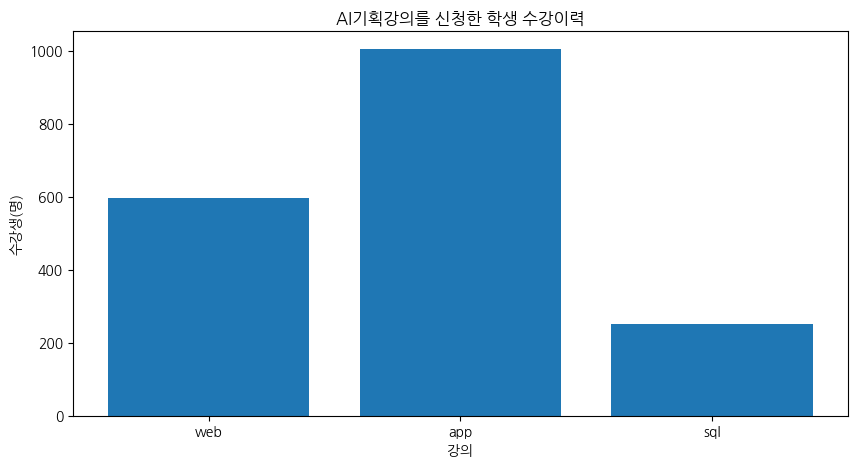

In [56]:
# 바 그래프
#그래프 사이즈 설정
plt.figure(figsize=(10,5))

#각각 어떤 값이 들어가야 하는지 입력해 볼까요?
#plt.bar(X축값, Y축값)
plt.bar(sum_of_students_by_class.index ,sum_of_students_by_class.values)

#그래프 타이틀
plt.title('AI기획강의를 신청한 학생 수강이력')

#x축 레이블
plt.xlabel('강의')

#y축 레이블
plt.ylabel('수강생(명)')

#그래프 보여주기
plt.show()

## 분석 결론 도출
> AI기획강의를 재구매로 선택하는 내부 고객군을 찾아라!

팀장님!

이번 패키지 상품 기획을 위해 인공지능과정과 함께 구입한 강의들에 대한 데이터분석을 해보았는데요~

인공지능강의를 수강한 사람은 이스트WASSUP 에서 가장 인기 있는 웹개발강의를 듣고 

재구매한 인원이 가장 많을 것으로 예상되어서, 위 두 과목을 패키지로 구성하면 

AI기획강의의 구매 전환율을 높일 수 있을 것이라는 가설 하에 데이터를 뜯어 보았는데,

**의외로 아래 보시는 것과 같이, 앱개발 강의를 들었던 인원이 더 많더라고요!**

우리가 세웠던 가설와 다르게, 

**AI기획강의에 가장 관심이 많았던 고객은, 앱개발 강의 수강생 이었습니다.**

따라서, 새로운 가설 수립을 위해

**왜 앱개발 강의 수강생이 AI기획강의에 관심을 가졌는지에 대한 분석**이 필요해 보입니다!

# 데이터 분석 프로젝트 4차

## 배경 파악 및 가설 세우기
[상황]

우리는 앱개발 강의 수강자가 AI기획 강의를 다른 강의에 비해 신청이 많은 것을 확인했습니다. 

그렇다면, **왜 앱개발 강의 수강자가 AI기획강의에 관심이 많은 것인지 확인해보아야겠네요!**

이 두 클래스를 신청한 사람들의 공통 관심사를 안다면, 

마케팅 전략을 좀 더 효과적으로 짤수 있겠군요!

그래서 우리는 또다른 가설을 세우고, 관련 데이터 분석을 하기로 결심 했습니다

**가설 new :** 

**앱개발 강의수강자과 AI기획강의 신청자의 공통 관심사는 중 가장 큰 비율을 차지하는 것은** 

**AI서비스 앱 개발(창업)을 통한 부수입 창출일 것이다.**

→ 둘 다 자기 계발겸 부수입을 창출할 수 있는 주제이니 애초에 AI서비스 창업에 관심이 있는 인원이 수강신청 했을 듯 합니다!   
이 내용을 데이터 분석으로 확인해봅시다!
> 앱 개발 수강생과 AI기획 수강생의 가장 큰 수강 목적을 찾아라!

## 데이터 로드 및 살펴보기
* user_db_app.csv
* user_db_ai.csv
```
`user_id`: 회원 고유 아이디

`gender`: 성별

`area`: 지역

`access_media`: 등록 경로

`goal`: 수강 신청 사유
```

In [40]:
#수강 데이터 가지고 오기
user_data_app = pd.read_table('data/user_db_app.csv',sep=',')
user_data_ai = pd.read_table('data/user_db_ai.csv',sep=',')

In [41]:
user_data_app.head()

,user_id,gender,area,age,access_media,goal
0,1a8adcf53f881ee8,남,송파구,20,인스타그램,아이디어 실현
1,bfd8847e1257757f,남,강서구,30,검색,부수입 창출
2,f4445dcb39d1bc54,남,도봉구,20,인스타그램,부수입 창출
3,75ac4eb719d64179,여,용산구,20,인스타그램,업무효율
4,f258561fb134f6fd,여,은평구,30,네이버,문제해결


In [42]:
user_data_ai.head()

,user_id,gender,area,access_media,goal
0,9ba84e9cf8733ce6,남,강남구,페이스북,아이디어 실현
1,224bf36b191449c1,여,중구,오프라인 광고,문제해결
2,baf7aaf4e287ed86,여,광진구,네이버,부수입 창출
3,629ace9ab8ede18d,남,강서구,지인추천,의사결정
4,89ea14ec83acd6c2,남,관악구,인스타그램,아이디어 실현


In [43]:
user_data_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1000 non-null   object
 1   gender        1000 non-null   object
 2   area          1000 non-null   object
 3   age           1000 non-null   int64 
 4   access_media  1000 non-null   object
 5   goal          1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [44]:
# 수치형 데이터에 맞춰진 듯
user_data_app.describe(include='all')

,user_id,gender,area,age,access_media,goal
count,1000,1000,1000,1000.000000,1000,1000
unique,1000,2,10,NaN,7,6
top,1a8adcf53f881ee8,여,강남구,NaN,인스타그램,부수입 창출
freq,1,661,221,NaN,315,400
mean,NaN,NaN,NaN,23.840000,NaN,NaN
std,NaN,NaN,NaN,8.895703,NaN,NaN
min,NaN,NaN,NaN,10.000000,NaN,NaN
25%,NaN,NaN,NaN,20.000000,NaN,NaN
50%,NaN,NaN,NaN,20.000000,NaN,NaN
75%,NaN,NaN,NaN,30.000000,NaN,NaN


In [45]:
user_data_ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1000 non-null   object
 1   gender        1000 non-null   object
 2   area          1000 non-null   object
 3   access_media  1000 non-null   object
 4   goal          1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [46]:
user_data_ai.describe()

,user_id,gender,area,access_media,goal
count,1000,1000,1000,1000,1000
unique,1000,2,10,7,6
top,9ba84e9cf8733ce6,여,강남구,인스타그램,부수입 창출
freq,1,654,192,305,440


가설을 검증하기 위해 우리가 알아야 할것은   
* 각 수업 별 수강 신청 이유(userid, goal)

## 데이터 전처리
수강 신청 목표에 따라 수강생의 수의 합계를 구할 필요 있겠죠?   
⇒ “수강 신청 이유 ” 학생수 구하려면 어떤 메서드를 쓰는게 좋을까요?

In [47]:
print(user_data_app['goal'].unique())
print(user_data_ai['goal'].unique())

['아이디어 실현' '부수입 창출' '업무효율' '문제해결' '의사결정' '리서치 능력']
['아이디어 실현' '문제해결' '부수입 창출' '의사결정' '리서치 능력' '업무효율']


In [48]:
#수업 신청 목표 기준으로 수강생 수 집계
app_users_goal = user_data_app.groupby('goal')['user_id'].count()
app_users_goal

goal
리서치 능력      46
문제해결        95
부수입 창출     400
아이디어 실현    140
업무효율       104
의사결정       215
Name: user_id, dtype: int64

In [49]:
#수업 신청 목표 기준으로 수강생 수 합계
ai_users_goal= user_data_ai.groupby('goal')['user_id'].count()
ai_users_goal

goal
리서치 능력      50
문제해결        70
부수입 창출     440
아이디어 실현    140
업무효율        85
의사결정       215
Name: user_id, dtype: int64

## 데이터 시각화

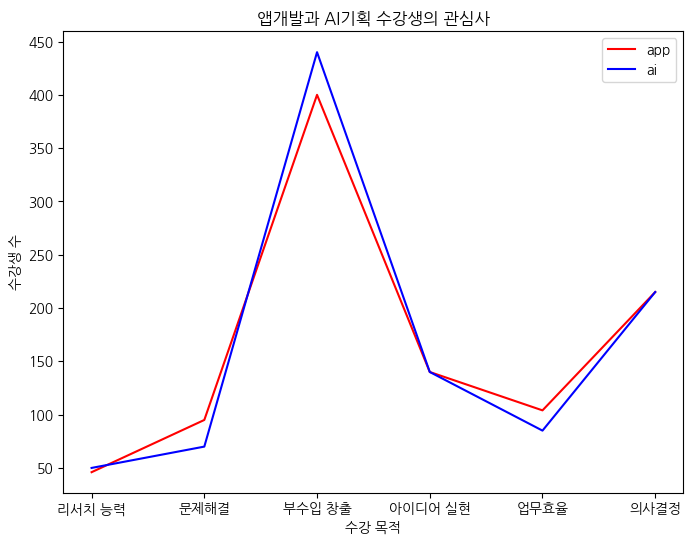

In [50]:
#그래프 크기 설정 (인치)
plt.figure(figsize=(8,6))

#x축 y축 설정을 동일하게 해주고, color와, label을 추가 해주시면 됩니다. 참 쉽죠?

#app개발 수강생 관심 분야
plt.plot(app_users_goal.index, app_users_goal.values, color="red", label="app")
#AI기획 수강생 관심 분야
plt.plot(ai_users_goal.index, ai_users_goal.values, color="blue", label="ai")


#각 그래프의 범례는 .legend()을 이용하여 만들어 줍니다! :)
plt.legend()

#그래프 타이틀
plt.title("앱개발과 AI기획 수강생의 관심사")
#x축 레이블
plt.xlabel('수강 목적')
#y축 레이블
plt.ylabel('수강생 수')

#그래프 보여주기
plt.show()

## 결론 도출
> 앱 개발반 수강생과 AI반 수강생의 가장 큰 수강 목적을 찾아라!

**팀장님!**

“**앱개발 과정과 AI기획과정의 신청자의 공통 관심사는 중 가장 큰 비율을 차지하는 것은 부수입 창출일 것이다.”** 

라는 가설 증명을 위해 데이터를 분석해보았는데요~

아래 보시는 것과 같이,

예상과 같이

**앱 개발, 그리고 AI기획과정의 신청자의 공통 관심사는 “부수입” 창출 이었습니다.**

따라서, 판매 증대를 위해, 

앱개발 과정과 AI기획 과정을 묶어서 부수입 창출을 위한 AI 앱서비스 창업 강의 패키지를 출시하고

“부수입 창출 또는 창업”을 메인 키워드로 내세워 홍보 효과를 증대 시킬수 있을 것 같습니다

# 데이터 분석 프로젝트 5차
* 할인은 정말 효과적인 선택일까?

## 배경 파악 및 가설 세우기
* [상황]
- 문제 파악 :
    
    결제 마지막 페이지에서 이탈률이 높은 상황입니다.
    
    확인 해 본 결과, 결제 페이지 오류는 없는 상황입니다.
    
    금액이 고객들의 구매 결정에 걸림돌이 되는 것으로 예상됩니다.
    
- 원하는 결과 :
    
    결제 마지막 페이지에서 고객 이탈율을 줄이고 싶습니다.
---
- **문제 해결을 위해 세운 가설 확인하기**
    
    **결제 마지막 페이지에서 할인 쿠폰을 제공하여 금액적으로 구매 결정에 걸림돌을 제거해준다면 결제율을 높일수 있을 것이다.**
---
- 그럼 데이터분석은 무얼 먼저 해보아야 할까요?   

**이 부분을 확인 하기 위해 우리는 실험을 진행 하였습니다.**

같은 기간동안 선착순으로 결제 페이지에 접속한 **각 12000명을 대상으로** 

**첫번째 그룹** 마지막 페이지 결제 접속자 에게 마지막 결제 페이지에 할인 쿠폰을 제공

**두번째 그룹** 마지막 페이지 결제 접속자 에게 할인 쿠폰 미 제공(정가 구매 유도)

을 하여 할인 혜택이 실제 결제율에 얼마나 영향을 주는지 알아 봅시다.
> 1.2만명 AB테스트
> 할인은 정말 효과적인 선택일까?

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 로드 및 살펴보기
```
`user_id`: 회원 고유 아이디
`gender`: 성별
`age`: 나이대 
`access_media`: 수업 신청 경로
`group`:  할인 받은 여부, 할인을 받은 자는 1, 할인을 받지 않는 자는 0입니다.
`discounted`: 할인의 종류
```

In [51]:
user_data = pd.read_table('data/user_db.csv',sep=',')
user_data

,user_id,gender,area,age,access_media,group,discounted
0,78ff837c7cea9f33,남,송파구,20,인스타그램,1,10000.0
1,2987aa87d23c9e3d,남,강서구,30,검색,1,30000.0
2,23182525e9996864,남,도봉구,20,인스타그램,1,20000.0
3,ffb6913842d617a5,여,용산구,20,인스타그램,1,20000.0
4,2c6822e7e833dc95,여,은평구,30,네이버,1,30000.0
...,...,...,...,...,...,...,...
8123,6da398d852411234,여,은평구,30,지인추천,0,NaN
8124,6da398d852411235,남,강서구,30,검색,0,NaN
8125,6da398d852411236,여,용산구,20,인스타그램,0,NaN
8126,6da398d852411237,남,광진구,30,네이버,0,NaN


In [52]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       8128 non-null   object 
 1   gender        8128 non-null   object 
 2   area          8128 non-null   object 
 3   age           8128 non-null   int64  
 4   access_media  8128 non-null   object 
 5   group         8128 non-null   int64  
 6   discounted    5654 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 444.6+ KB


In [53]:
user_data.describe()

,age,group,discounted
count,8128.000000,8128.000000,5654.000000
mean,24.212598,0.695620,24333.215423
std,8.626341,0.460173,7290.153174
min,10.000000,0.000000,10000.000000
25%,20.000000,0.000000,20000.000000
50%,20.000000,1.000000,30000.000000
75%,30.000000,1.000000,30000.000000
max,50.000000,1.000000,30000.000000


가설을 검증 하기 위해 우리가 알아야 할 것
* 실제 결제 한 사람들이 할인 받은지에 대한 여부 (group 할인받은 여부)

## 데이터 전처리

In [54]:
# step 1) 할인을 받아 결제한 사람과, 정가 결제 한 사람의 인원 수 구하기

# user_data['group'] ==1 이라는 조건을 두고 그것이 일치하는 user의 수를 세면 됩니다!
 #할인 혜택 받은 사람의 결제 수 
sum_of_students_by_discounted = user_data[user_data['group']==1]['user_id'].count()
sum_of_students_by_discounted

5654

In [55]:
# 할인 혜택 받지 않은 사람의 결제 수
sum_of_students_by_not_discounted = user_data[user_data['group']==0]['user_id'].count()
sum_of_students_by_not_discounted

2474

In [56]:
# step 2)각 그룹의 결제 전환율 구하기 

#각 결제 인원에서 실제 실험 인원인 12000명을 나누고 각 퍼센테이지 구하기
percent_of_students_by_not_discounted = (sum_of_students_by_not_discounted/12000) *100

percent_of_students_by_discounted = (sum_of_students_by_discounted/12000) *100

print(percent_of_students_by_not_discounted , percent_of_students_by_discounted )

20.616666666666667 47.11666666666667


## 데이터 시각화

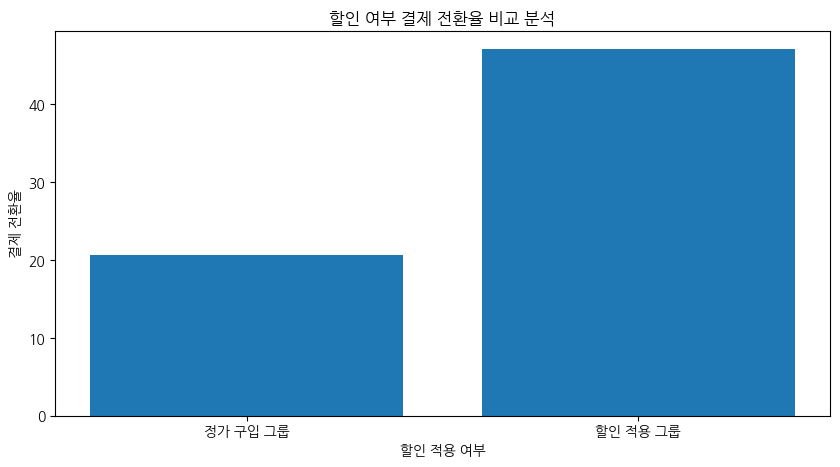

In [57]:
#그래프 사이즈
plt.figure(figsize=(10,5))
#x 그룹 지정하기
x_list =["정가 구입 그룹", "할인 적용 그룹"]
#y 값
#각각 어떤 값이 들어가야 하는지 입력해 볼까요?
y_list = [percent_of_students_by_not_discounted ,percent_of_students_by_discounted]

#x,y값 설정
plt.bar(x_list, y_list)
#그래프 타이틀
plt.title('할인 여부 결제 전환율 비교 분석')
#x축 레이블
plt.xlabel('할인 적용 여부')
#y축 레이블
plt.ylabel('결제 전환율')
#그래프 보여주기
plt.show()

## 분석 결론 도출
> 마지막 결제 페이지의 할인 쿠폰은 구매 결정에 결정적일 것인가?

**팀장님!** 결제 마지막 페이지에서 이탈률의 원인이 가격 때문인지 확인을 위해서

가격 허들이 낮아질 경우 구입에 긍정적 영향을 미칠 수 있는가에 대하여

**할인 쿠폰을 제공 여부로** AB테스트를 진행했는데요 해당 내용 결과 공유 드립니다!

- **첫번째 그룹** 마지막 페이지 결제 접속자 에게 마지막 결제 페이지에 할인 쿠폰을 제공
- **두번째 그룹** 마지막 페이지 결제 접속자 에게 할인 쿠폰 미 제공(정가 구매 유도)

위 그래프를 보시는 것과 같이,

문제 해결을 위한 세웠던 가설과 동일하게 

**할인 적용 신청 그룹의 신청율이 46% 대 20%로** 

**정가 구입 그룹 보다 월등히 높은 것을 확인할 수 있습니다**

따라서, 고객의 구매 장벽을 낮추기 위해 마지막 페이지에 

적절한 할인을 제시하는 것이 신규 수강생 모집에 효과적으로 보입니다.

## Quiz
결제 마지막 페이지에서 할인 혜택을 제공할 경우

결제율을 올릴 수 있다는 것을 확인 했습니다. 

**그렇다면, 얼마만큼의 할인 혜택을 제공하는 것이 결제 전환율을 가장 높일 수 있는지 궁금해졌습니다!**

**할인률이 높으면 높을수록 결제가 많아지는지 데이터를 통해 알아볼까요~?**

증명하고자 하는 가설 **:** 

**할인율이 높으면 높을 수록** 결제 전환율**도 높을 것이다.**

그리하여, 각 1만원, 2만원, 3만원 쿠폰을 동시에 발송** 하였다 

### 데이터 로드 및 살펴보기
* user_db.csv
```
`user_id`: 회원 고유 아이디

`gender`: 성별

`age`: 나이대 

`access_media`: 수업 신청 경로

`group`:  할인 받은 여부

`discounted`: 할인의 종류
```

In [76]:
user_data = pd.read_table('data/user_db.csv',sep=',')
user_data

,user_id,gender,area,age,access_media,group,discounted
0,78ff837c7cea9f33,남,송파구,20,인스타그램,1,10000.0
1,2987aa87d23c9e3d,남,강서구,30,검색,1,30000.0
2,23182525e9996864,남,도봉구,20,인스타그램,1,20000.0
3,ffb6913842d617a5,여,용산구,20,인스타그램,1,20000.0
4,2c6822e7e833dc95,여,은평구,30,네이버,1,30000.0
...,...,...,...,...,...,...,...
8123,6da398d852411234,여,은평구,30,지인추천,0,NaN
8124,6da398d852411235,남,강서구,30,검색,0,NaN
8125,6da398d852411236,여,용산구,20,인스타그램,0,NaN
8126,6da398d852411237,남,광진구,30,네이버,0,NaN


* 가설 검증을 위한 우리에게 필요한 정보는?
```   
`user_id`: 회원 고유 아이디
`group`:  할인 받은 여부
`discounted`: 할인의 종류
```

### 데이터 전처리

In [77]:
#각 할인별 신청한 수강생 수 구하기
students_discounted = user_data.groupby('discounted')['user_id'].count()
students_discounted

discounted
10000.0     808
20000.0    1588
30000.0    3258
Name: user_id, dtype: int64

### 데이터 시각화

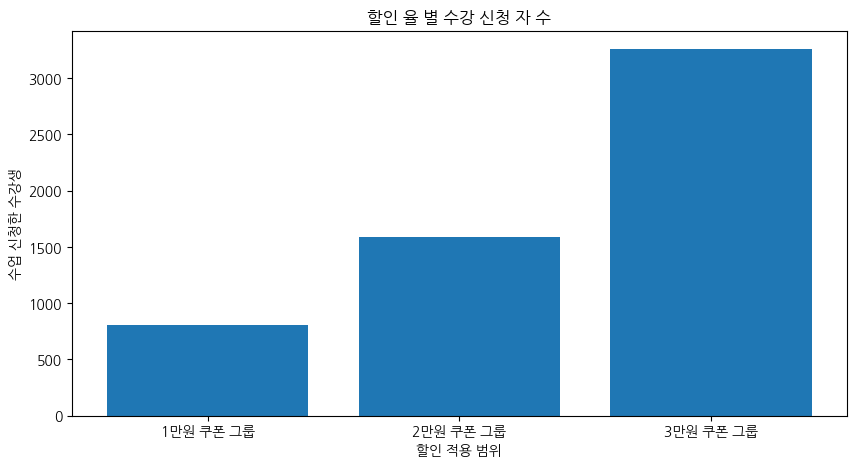

In [78]:
#그래프 사이즈 
plt.figure(figsize=(10,5))
x_list =["1만원 쿠폰 그룹", "2만원 쿠폰 그룹", "3만원 쿠폰 그룹"]
#x,y값 설정
plt.bar(x_list, students_discounted.values)
#그래프 타이틀
plt.title('할인 율 별 수강 신청 자 수')
#x축 레이블
plt.xlabel('할인 적용 범위')
#y축 레이블
plt.ylabel('수업 신청한 수강생')
#그래프 보여주기
plt.show()


# 데이터 분석 프로젝트 6차
**이스트 팀장**

“이스트 WASSUP 에서 수강 완주율은 
좋은 컨텐츠 제공 여부 및 수강생 관리가 잘 되어 가고 있는지에 대한 가장 중요한 지표 입니다.   
그런데 지난 8월 중순 부터 웹개발 종합반의 완주율이 크게 떨어졌습니다.”  

## 이번 주는 무엇이 수강생들의 완주율에 가장 큰 영향을 미쳤는지 함께 고민 해 보고 개선해 봅시다.
> 8월 중순부터 완주율이 크게 떨어졌습니다. 이유를 찾아서 개선해봅시다!
---
저번주와 같이 **문제에 대한** **직접 가설을 세워보고 그걸 검증하는 연습**을 해볼거예요!

이제 기존 방식은 충분히 익숙해졌으니 한 걸음 더 나아갈 수 있는 내용을 가져왔어요!

1. 가설을 세우는 과정을 좀 더 자세히 배워봅시다
2. 기존의 두 가지 요소를 보는 그래프에서 한 단계 업해서 세 가지 요소를 한 눈에 시각화 해봅시다

## 배경 파악 및 가설 세우기
### 고객의 입장에서 수업을 듣는 여정 생각 해보기
**왜 이 과정이 필요 할까요?**
문제해결을 위한 가설을 세우기 이전에 어떤 변수가 있을지 파악해야하기 때문입니다.   
생각한 가설 이외의 다른 변수가 있으면 데이터 분석이 유효하기 어려우므로   
전체적으로 보면서 영향을 주는 요소에는 어떤 것이 있을지 **살피는 과정이 필요합니다.**   

**고객 여정을 생각해보면**   
**고객의 여정에 문제가 될 수 있는 것들을 파악 할 수 있습니다**.   
**어떤 부분에 개선이 필요한지 보다 명확하게 볼 수 있는 것이죠!**    
→ 우리의 경우 수강생의 완주율과 관련한 **수강 여정에 대해 생각**해보면 되겠네요?

---
* **고객은 다음과 같은 과정을 거쳐 우리의 강의를 듣습니다 **

**[수강 여정]**
1. 강의를 들을 수 있는 시간적 여유가 생긴다.
    * 우리가 그 사람들을 안 바쁘게 만들 수는 없으므로 아쉽게도 우리가 직접적으로 해결 할 수 있는 문제는 아닙니다!   
    * 하지만, 추후 새로운 컨텐츠 제작이나 마케팅을 할 때 적절한 포지셔닝을 잡아갈 수 있습니다!   
    * 이 사람들이 완강하지 못했다는 것은, 우리가 타겟한 사람에게 우리가 진정성 있는 도움을 드리지 못했다는 것이니까요!   

2. 강의를 들어야겠다고 마음을 먹는다.
    * 고객을 동기부여 시키는 구간인데요. 이 부분은 우리가 고객 관리를 통해 개입할 수 있는 부분 입니다.
    * 데이터를 살펴보면 좋겠군요! 저희는 “집중 케어”라는 수강을 독려하는 서비스가 있으니 이 부분을 뜯어볼까요~?
    * 집중 케어 : 수강생들이 중간에 포기하지 않도록 전화와 메신저로로 집중 관리해드리는 것을 말해요! 

3. 강의를 듣기 위해 콘텐츠에 접근한다.
    * 개입이 가능합니다!
    * 강의를 들을때, 오류가 있거나 수강이 불편하게 되어있다면 수업을 더 지속하지 않을 사람들이 많이 있겠죠?
    * 고객이 강의 접근 과정에 있어 문제가 없도록 하는 것이 중요합니다.
    * 예를 들어, 웹페이지 시스템의 불편 사항, 영상 오류 여부 등이 영향을 미치지는 않았을지 점검 해보아야 합니다.
    * **→ 이번 시간에는 “확인 결과 수강 오류는 없었다” 라고 가정하겠습니다-! :)**

4. 콘텐츠를 2에서 목표한 부분까지 듣는다
    * 해당 내용은 컨텐츠를 개선하여 해결이 가능합니다.
    * 콘텐츠를 듣지 않는 이유는 다양한 이유가 있겠지만
    * 가장 중요한 요소는 “흥미도” 와 “실용성”입니다.
    * 우리가 제공하는 컨텐츠가 재미있고 실용적인지 체크가 필요합니다.
---
> 1, 2, 4번이 각각 문제가 있지는 않을지 확인해보면 어떤 것이 완주를 가로막고 있을지에 대해 파악할 수 있습니다.   
> 어떤 점을 개선하면 완주율을 높일 수 있을지 가설을 세워 확인하는 시간을 가져보겠습니다.

## 배경 파악 및 가설 세우기
> 우리는 적절한 타겟에게 판매를 하고 있을까? 

시간이 없어 듣지 못하는 고객의 경우 저희가 무언가를 개선한다고 완주를 할 수 없습니다.   
애초에 만족할 수 없는 고객에게 판매를 한 것이니 장기적 관점에서 포지셔닝 변경이 필요합니다.   
⇒ 이스트WASSUP 정말로 포지셔닝 변경이 필요할지 데이터로 살펴봅시다!   
* 보통 포지셔닝을 변경하는 일은 흔치 않으나 오늘은 전체적으로 뜯어보기로 하였으니 함께 체크해보아요! :)
---
* 현재 상황 살펴보기   
1️⃣ 이스트WASSUP 광고의 메인 타겟은 2-30대입니다.   
2️⃣ 2-30대의 구매 건수는 다른 나이대에 비해 높은 편입니다.   
3️⃣ 이번에 완주 후 퀴즈를 제출하는 이벤트에서 2-30대의 참여율이 저조했습니다.   
4️⃣ 퀴즈에 참여하지 않은 인원의 전화인터뷰에서 “바빠서”라는 답변이 압도적으로 많았습니다.   

---
* 우리가 풀어야할 문제는?
    * 8월 중순부터 인공지능과정의 완주율이 크게 떨어진 이유를 밝혀야 합니다.   
    * 완주가 가능한 수강생들이 수강을 할 수 있도록 적절한 포지셔닝을 고민해야 합니다.   
---
* 위 상황을 보고 예측할 수 있는 것
    * 2-30대가 우리 프로덕트에 관심이 있다
    * 2-30대가 완주율이 다른 나이대에 비해 낮을 가능성이 있다
    * 2-30대가 완주율이 낮은 이유는 다른 나이대에 비해 바쁘기 때문일 수 있다.

→ 집단적으로 관심은 있었는데 지속적으로 수강을 할 수 없는 것은, 
    애초에 시간 부족 등의 이유로 참여하기 어려운 상황이었을 확률이 높습니다.

---
* 가설 세우기
    * 다른 연령대에 비해 바쁜 20~30대의 수강 완주율이 상대적으로 낮을 것이다.
* 생각 정리하기
* **[검증 방법]** : 나이대별 완주율을 비교한다
* **[이후 액션]** : 2-30대가 실제로 완주율이 낮을 경우 프로덕트가 적절한 고객에게 가지 못해 불만족이 발생하고 있는 상황이므로 프로덕트를 개선하거나 광고 메인 타겟을 변경할 수 있다.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 로드 및 살펴보기
* user_data.csv
```
`_id`: 회원 고유 아이디
`created_at`: 수강 등록 시점
`updated_at`: 최근 수강 완료 시점
`name:` 회원 이름
`marketing`: 마케팅 수신동의
`managed`: 찐한관리 여부
`gender`: 성별
`age`: 나이대 
`progress_rate`: 진도율
```

In [80]:
user_data = pd.read_csv('data/user_data.csv')
user_data.head()

,_id,created_at,updated_at,name,marketing,managed,gender,age,progress_rate
0,e88cbf158991b41c,2022-08-26 10:04:54,2022-10-07 8:35:47,온아린,False,True,male,10,100.00
1,34525c4c113ea233,2021-02-20 1:23:38,2022-08-08 22:04:00,유강민,False,False,female,40,63.64
2,8f869d1ce7289b3d,2021-02-20 1:23:38,2022-08-08 22:04:00,문민서,False,False,female,30,63.64
3,bf1e94f981743e8d,2022-07-22 15:59:44,2022-08-29 21:12:15,석준영,False,False,male,50,64.77
4,b281c6fc121a338c,2022-07-22 15:59:44,2022-08-29 21:12:15,석도현,False,False,male,20,64.77


In [81]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            2574 non-null   object 
 1   created_at     2574 non-null   object 
 2   updated_at     2574 non-null   object 
 3   name           2574 non-null   object 
 4   marketing      2574 non-null   bool   
 5   managed        2574 non-null   bool   
 6   gender         2574 non-null   object 
 7   age            2574 non-null   int64  
 8   progress_rate  2574 non-null   float64
dtypes: bool(2), float64(1), int64(1), object(5)
memory usage: 145.9+ KB


In [82]:
user_data.describe(include='all')

,_id,created_at,updated_at,name,marketing,managed,gender,age,progress_rate
count,2574,2574,2574,2574,2574,2574,2574,2574.000000,2574.000000
unique,2574,1410,1410,1729,2,2,2,NaN,NaN
top,e88cbf158991b41c,2022-07-19 13:47:32,2022-08-18 19:40:42,박아린,True,True,male,NaN,NaN
freq,1,6,6,6,2111,2515,1436,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.911422,67.781298
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.545661,40.208622
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,27.270000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,90.910000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,98.860000


* 어떤 것이 분석에 사용될까요?
    * 우리는, “나이대”별 “진도율”의 평균을 알아야 합니다!(age, progress_rate)

## 데이터 전처리

In [83]:
# 나이대별로 수강률 합 구하기
progress_rate_by_age = user_data.groupby('age')['progress_rate'].sum()
progress_rate_by_age

age
10    14446.05
20    74306.47
30    56793.87
40    15921.31
50    13001.36
Name: progress_rate, dtype: float64

In [84]:
#나이대별 수강인원 구하기
number_people_by_age = user_data.groupby('age')['_id'].count()
number_people_by_age

age
10     226
20    1043
30     835
40     240
50     230
Name: _id, dtype: int64

In [85]:
#나이대별 완주율 평균 구하기
average = progress_rate_by_age/number_people_by_age
average

age
10    63.920575
20    71.243020
30    68.016611
40    66.338792
50    56.527652
dtype: float64

## 데이터 시각화

<BarContainer object of 5 artists>

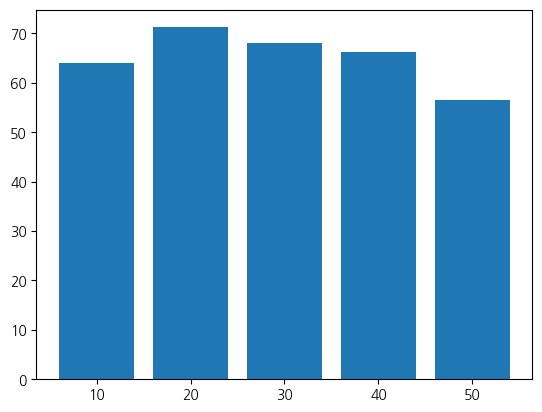

In [86]:
plt.bar(average.index, average, width=8)

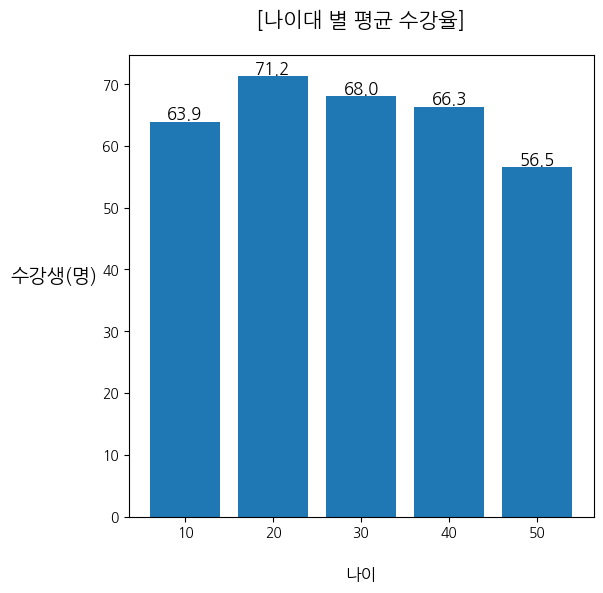

In [87]:
## plt.figure(width, height) : 넓이와 높이 만큼 이미지를 생성한다는 것을 말해줍니다!
plt.figure(figsize=(6,6))

#그래프의 x축 눈금 설정
plt.xticks([10,20,30,40,50])

#그래프의 바에 각 수치율을 추가 해 볼까요?
bar = plt.bar(average.index, average, width=8)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

#그래프의 제목
#타이틀과 그래프와의 간격은 pad= 수치 로 나타내어요!
plt.title('[나이대 별 평균 수강율]',fontsize=15,pad=20)

#그래프의 x축 라벨 이름
#labelpad 파라미터는 축 레이블의 여백을 지정합니다.
plt.xlabel('나이',fontsize=12,labelpad=20)

#그래프의 y축 라벨 이름
plt.ylabel('수강생(명)',fontsize=14,rotation=360,labelpad=35)

#그래프를 화면에 나타나도록 합니다.
plt.show()

## 분석 결론 도출
> 우리는 적절한 타겟에게 판매를 하고 있을까? 

**팀장님~**

저번 완주 후 퀴즈 이벤트에서 저희 메인 타겟층인 2-30대 인원의 참여율이 저조했었는데요,

실제 완주율도 비슷하게 낮을까 우려가 되어 나이대별 완주율 데이터를 살펴보았습니다!

다행히 아래 보시는 바와 같이,

2-30대의 완주율 평균이 다른 나이대와 비슷한 비율이라는 점을 확인했습니다-!

프로덕트가 적절한 고객에게 가지 못해 불만족이 발생하고 있지는 않을지 우려했는데 

다행히 프로덕트 개선이나 광고 메인 타겟을 변경 등은 고려에서 배제해도 좋을 것 같습니다!

참고 차 공유드려요-!  

# 데이터 분석 프로젝트 7차
* 집중 케어를 하면 완주율이 높아질까?

## 배경 파악 및 가설 세우기
고객이 강의를 들을 마음이 들도록 동기부여 하는 파트를 살펴봅시다.

이스트WASSUP의 경우, “집중케어”로 수강생을 동기부여 해서 꾸준한 수강을 돕고 있습니다!

“집중케어” 서비스는 정말로 고객의 완주를 돕고 있을까요?

---
* 현재 상황 살펴보기
    * 최근 3개월간 집중케어 신청 비율과 완주율이 모두 감소하고 있다.
    
* 우리가 풀어야 할 문제는 무엇인가요?
    - 8월 중순부터 인공지능과정의 완주율이 크게 떨어진 이유를 밝혀야 합니다.
    - 고객이 수강을 완료할 수 있도록 적절한 동기부여를 주어야 합니다.
    
- **위 상황에서 알 수 있는 점은 무엇인가요?**
    - 집중케어와 완주율이 동시에 감소했으므로 연관이 있을 가능성이 있습니다.
    
- **가설 세우기**
    - 집중케어를 받은 인원이 그렇지 않은 인원보다 완주율이 높을 것이다.
    
- **생각 정리하기**
    - **[검증 방법]**
        - 집중케어를 하는 집단과 하지 않는 집단을 나누어 완주율을 비교해볼 수 있습니다.
    - **[이후 액션]**
        - 집중케어를 받는 인원의 완주율이 높을 경우 : 집중케어 신청 비율 높이기
        - 집중케어를 받지 않는 인원의 완주율이 높을 경우 : 다른 동기부여 방법 고안하기
---
 > 집중케어를 하면 완주율이 높아질까?

## 데이터 로드 및 살펴보기
* user_data.csv
```
`_id`: 회원 고유 아이디
`created_at`: 수강 등록 시점
`updated_at`: 최근 수강 완료 시점
`name:` 회원 이름
`marketing`: 마케팅 수신동의
`managed`: 찐한관리 여부
`gender`: 성별
`age`: 나이대 
`progress_rate`: 진도율
```

In [58]:
user_data = pd.read_csv('data/user_data.csv')
user_data.head()

,_id,created_at,updated_at,name,marketing,managed,gender,age,progress_rate
0,e88cbf158991b41c,2022-08-26 10:04:54,2022-10-07 8:35:47,온아린,False,True,male,10,100.00
1,34525c4c113ea233,2021-02-20 1:23:38,2022-08-08 22:04:00,유강민,False,False,female,40,63.64
2,8f869d1ce7289b3d,2021-02-20 1:23:38,2022-08-08 22:04:00,문민서,False,False,female,30,63.64
3,bf1e94f981743e8d,2022-07-22 15:59:44,2022-08-29 21:12:15,석준영,False,False,male,50,64.77
4,b281c6fc121a338c,2022-07-22 15:59:44,2022-08-29 21:12:15,석도현,False,False,male,20,64.77


In [59]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            2574 non-null   object 
 1   created_at     2574 non-null   object 
 2   updated_at     2574 non-null   object 
 3   name           2574 non-null   object 
 4   marketing      2574 non-null   bool   
 5   managed        2574 non-null   bool   
 6   gender         2574 non-null   object 
 7   age            2574 non-null   int64  
 8   progress_rate  2574 non-null   float64
dtypes: bool(2), float64(1), int64(1), object(5)
memory usage: 145.9+ KB


In [90]:
user_data.describe()

,age,progress_rate
count,2574.000000,2574.000000
mean,26.911422,67.781298
std,10.545661,40.208622
min,10.000000,0.000000
25%,20.000000,27.270000
50%,30.000000,90.910000
75%,30.000000,98.860000
max,50.000000,100.000000


- 어떤 부분을 확인해야 할까요~?
    * 우리는 “집중케어”의 유무로 그룹을 나누어 각 그룹별 “진도율”의 평균을 알아야 합니다! (managed, progress_rate)

## 데이터 전처리

In [91]:
# 집중케어 유무로 분류한 각 그룹의 수강생 수 전처리 하기
# managed = ['TRUE','FALSE'] # 데이터 수정하기
# managed

In [92]:
# 관리 여부에 따라, 수강완료율 평균 구하기
managed_data_avg = user_data.groupby('managed')['progress_rate'].sum() / user_data.groupby('managed')['_id'].count()
managed_data_avg

managed
False    38.587119
True     68.466171
dtype: float64

## 데이터 시각화

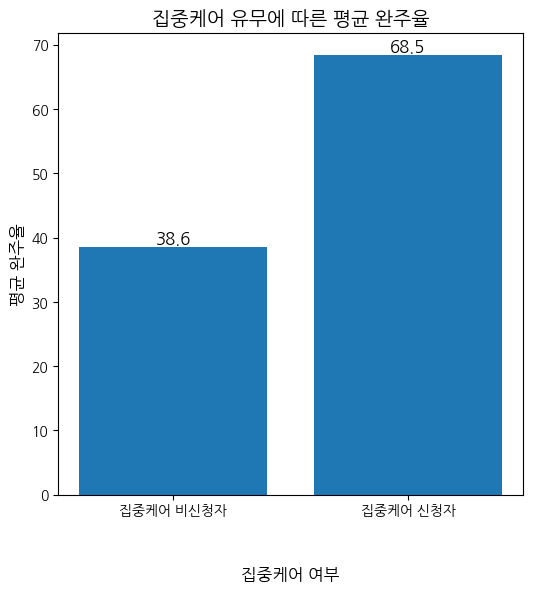

In [93]:
#plt.figure(width, height) : 넓이와 높이 만큼 이미지를 생성한다는 것을 말해줍니다!
plt.figure(figsize=(6,6))


#각각 어떤 값이 들어가야 하는지 입력해 볼까요?

#그래프의 바에 각 수치율을 추가 해 볼까요?
bar = plt.bar(managed_data_avg.index, managed_data_avg.values)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

#그래프의 제목
plt.title('집중케어 유무에 따른 평균 완주율',fontsize=14)

#그래프의 x축 라벨 이름
plt.xlabel('집중케어 여부',fontsize=12,labelpad=35)

#x축 눈금 레이블 지정하기
#기존의 0,1이라는 x축 레이블을, labels =["..."]로 변경 가능 합니다 :)
plt.xticks([0,1], labels=["집중케어 비신청자","집중케어 신청자"])

#그래프의 y축 라벨 이름
plt.ylabel('평균 완주율',fontsize=12)

#x축 눈금
plt.xticks()
#y축 눈금
plt.yticks()
#그래프를 화면에 나타나도록 합니다.
plt.show()

## 분석 결론 도출
>  집중케어를 하면 완주율이 높아질까?

**팀장님! 고객 완주율 개선을 위해 동기부여 관련한 부분 확인한 결과 공유드립니다!**

최근 3개월간 집중케어 신청 비율과 완주율이 모두 감소한 점을 보면

집중케어를 받지 못한 인원이 많아 완주율이 꺾인 것이 아닐지 의심이 되었습니다.

그래서 저희 집중케어 서비스가 완주에 효과가 있을지 데이터를 살펴보았습니다.

**“집중케어”를 받는 인원과 받지 않는 인원을 나누어서**

각 그룹별 완주율의 평균을 비교했는데요

아래 보시는 바와 같이,

집중케어를 받지 않은 그룹의 **수강 완주율은 `38.6%`**

집중케어를 받은 그룹의 **수강 완주율은 `68.5 %`로**

집중케어를 **받은 그룹의 완주율이 월등히 높은 것을 확인할 수 있었습니다.**

실제로 집중케어 신청 비율을 높이는 액션을 진행해보는 것이 완주율 개선에 효과적일 것 같습니다!

수업 시작 전, 집중케어 참여를 적극적으로 유도해보아도 좋을 것 같네요-!

# 데이터 분석 프로젝트 8차
> 프로덕트 개선은 정말 도움이 되었을까?

## 배경 파악 및 가설 세우기
목표한 만큼 강의 컨텐츠를 모두 수강 완료하는 것에 도움을 주려면
콘텐츠가 충분히 흥미있고 유익해야 합니다. 이 부분을 확인해볼까요?

**→ 앗 이미 8월 즈음 콘텐츠 개편이 완료되어 적용된 상황입니다!
→ 흠.. 8월이라.. 완주율이 꺾인 시점과 유사한데 좀 더 파볼까요?**

* **현재 상황 살펴보기**
    * 8월 2주 차 개강반부터 새로 제작된 3주차(3번) 콘텐츠를 듣기 시작했습니다.
    * 매 주 (녹화)강좌가 개강되고, 각 강좌에는 주차별(순서) 강의 콘텐츠를 포함한다.(1주차(1번) 강의, 2주차(2번) 강의, ...)

---
- **우리가 풀어야 할 문제는 무엇인가요?**
    - 고객이 수강을 완료할 수 있도록 흥미롭고 도움이 되는 콘텐츠를 제공해야 합니다.
    - 8월 중순부터 웹개발 종합반의 완주율이 크게 떨어진 이유를 밝혀야 합니다.
        
- **위 상황에서 알 수 있는 점은 무엇인가요?**
    - 8월 중순부터 웹개발 종합반의 완주율이 크게 떨어졌으므로, 
    비슷한 시기에 진행한 프로덕트 개선이 영향을 미쳤을 가능성이 있어보입니다.
    
- **가설을 세워봅시다**
    - **8월 둘째 주 부터 변경된 3주차(3번) 강의의 완주율이 현저히 떨어졌을 것이다.**
    
- 가설에 따라 이후 액션이 어떻게 될까요?
    - 정말 문제가 있었을 경우 : 이전의 커리큘럼으로 돌아간다
    - 문제가 없었을 경우 : 다른 요인을 찾아본다
---
- **적절한 데이터 검증 방법 생각해보기**
    * **가설 : 8월 둘째 주 부터 변경된 3주차(3번) 강의의 완주율이 현저히 떨어졌을 것이다.**
* 자, 변경을 한 것이 정말 부정적 결과를 낳았는지 확인하려면 어떤 시점의 어떤 데이터를 봐야 할까요?
    * “변경 직전과 변경 완료 시점의 전체 완주율을 비교하면 되는 것 아닐까요?”
        * 오호! 합리적이네요. 특정 기점을 기준으로 변경을 했으니 그 직전과 직후의 완주율을 살펴본다면  문제가 있었는지 없었는지 알 수 있겠군요!! 아래 그래프처럼요!
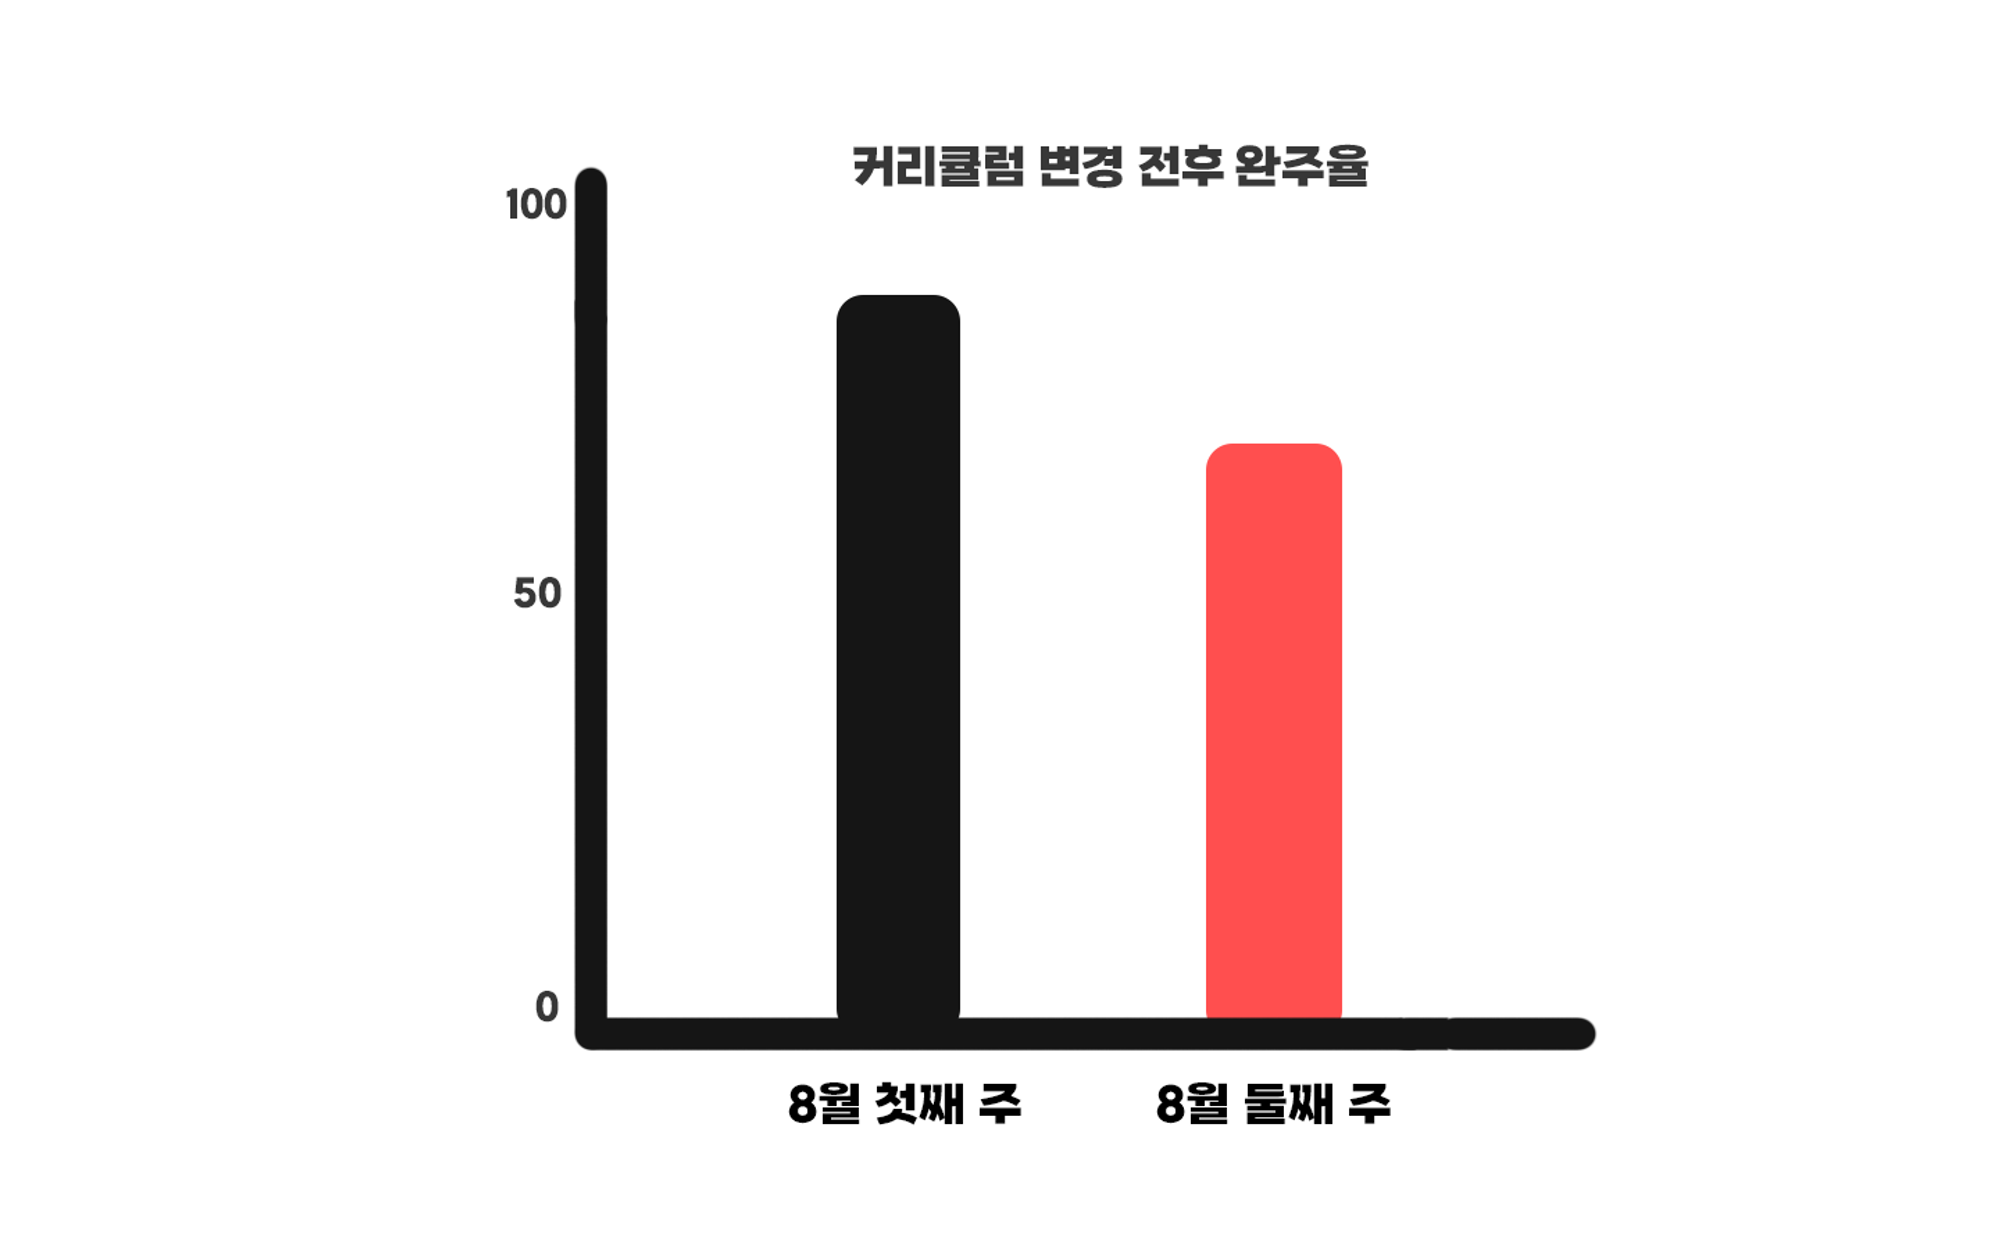
        
* 어라 그런데 전체 완주율만 봤더니, 이게 진짜 3주차(3번) 강의 교안을 바꿔서인지 다른 요인 때문에 떨어진 것인지 알기가 어려운 것 같습니다!
    * “앗 그러면 주차별로 완주율을 볼 수 있도록 하면 되지 않을까요?”
        * 오! 좋습니다! ㅎㅎ 각각 하나의 큰 덩어리로만 있던 완주율을 주차 별로 세부적으로 쪼개면 변경했던 3주차(3번) 강의만 급격히 떨어진 것일지 확인이 가능하겠어요!
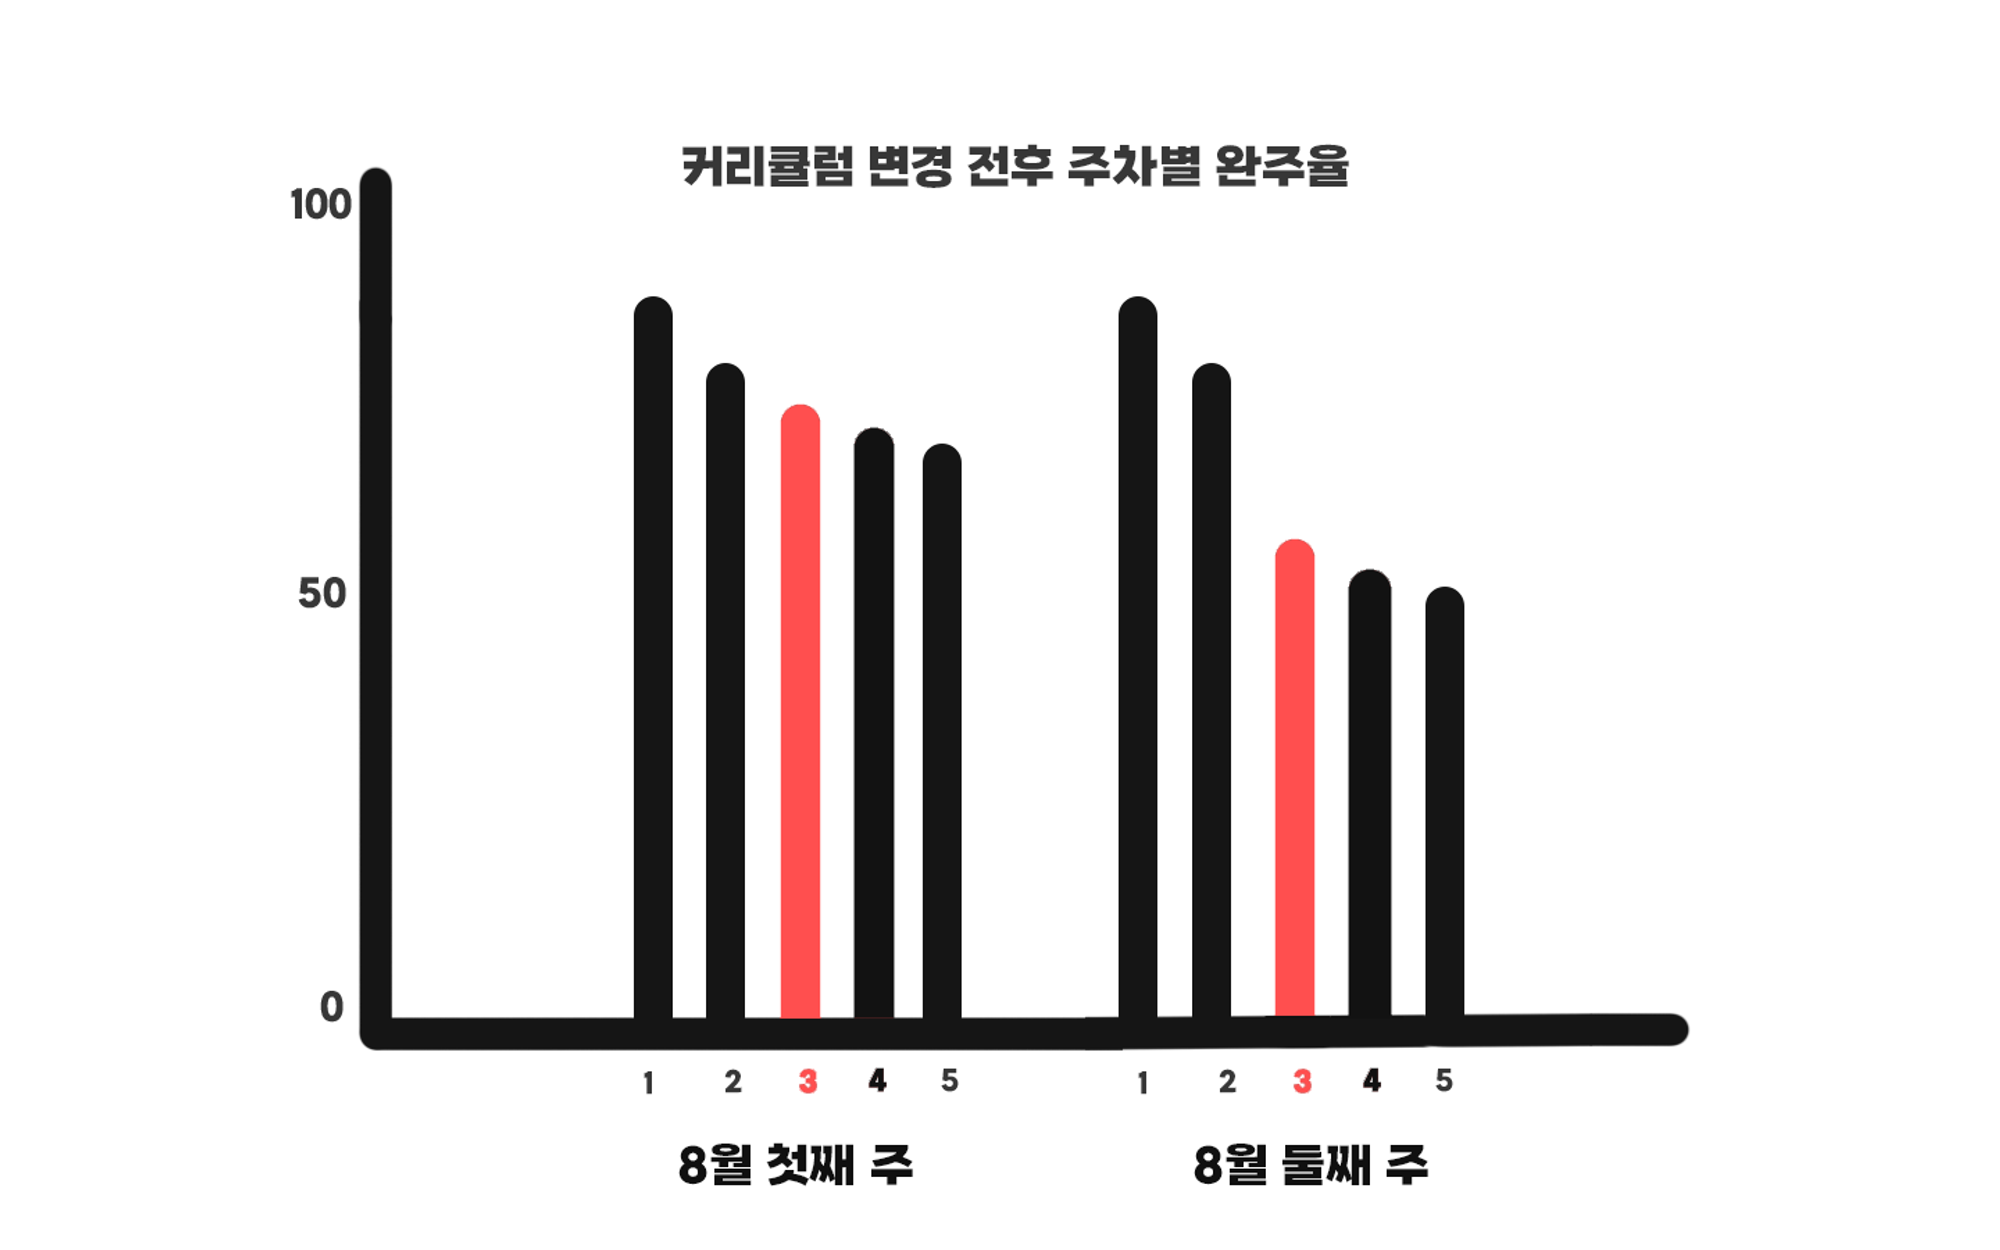

* 그런데 딱 바뀐 직전과 직후만 보아도 될까요?
일시적으로 우연하게 떨어졌을 수도 있으니 다른 일자 개강일도 비교해보아야 하지 않을까요?
    * 그럼 좀 더 넓은 범위의 개강 시작일별 주차별 완주율을 시각화해볼까요?
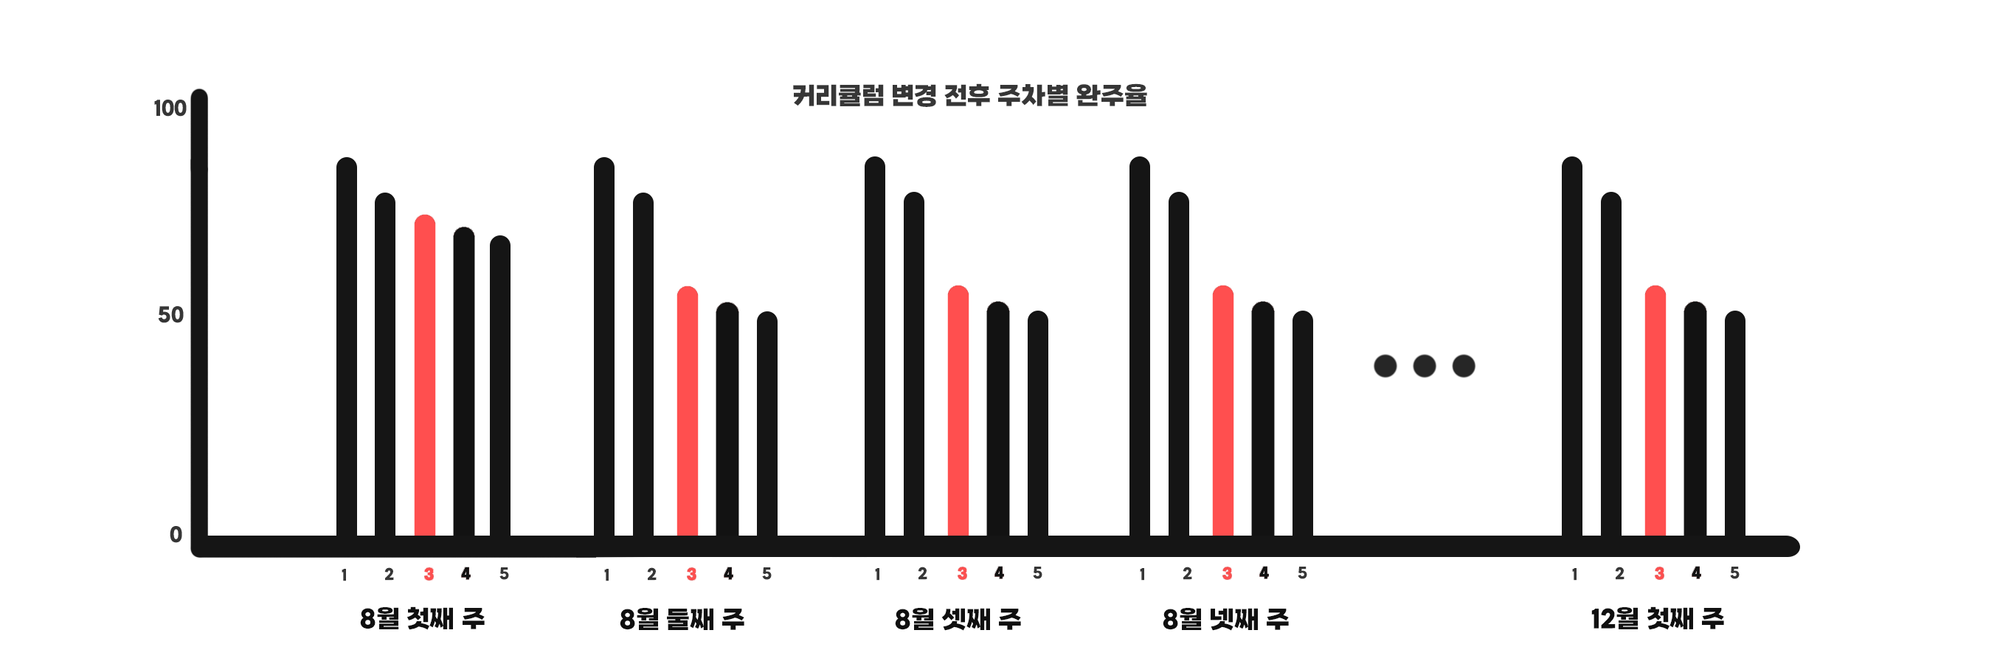

* “**흠…. 그런데… 좀.. 많이 복잡하지 않나요..?”**
    - 지금까지의 그래프들과 다른 것 같아요! 왜 이렇게 복잡하게 시각화 해야 할까요?
* 2가지 요인이 복합적으로 작용한 결과를 한 눈에 보려 해서 그렇습니다!   
        ⇒ 오케이! 이번 시간에는 이럴 때 사용할 수 있는 검증 방법을 알려드릴게요! 
        
---
* 실제로 어떻게 시각화를 할 수 있을까요?
**심플합니다! x축 y축을 우리가 확인하고 싶은 요소로 바꾸면 됩니다!**   
(원래는 한 축은 보통 수치를 나타내는 요소로 하는데 이번에는 그렇게 진행하지 않습니다! :)
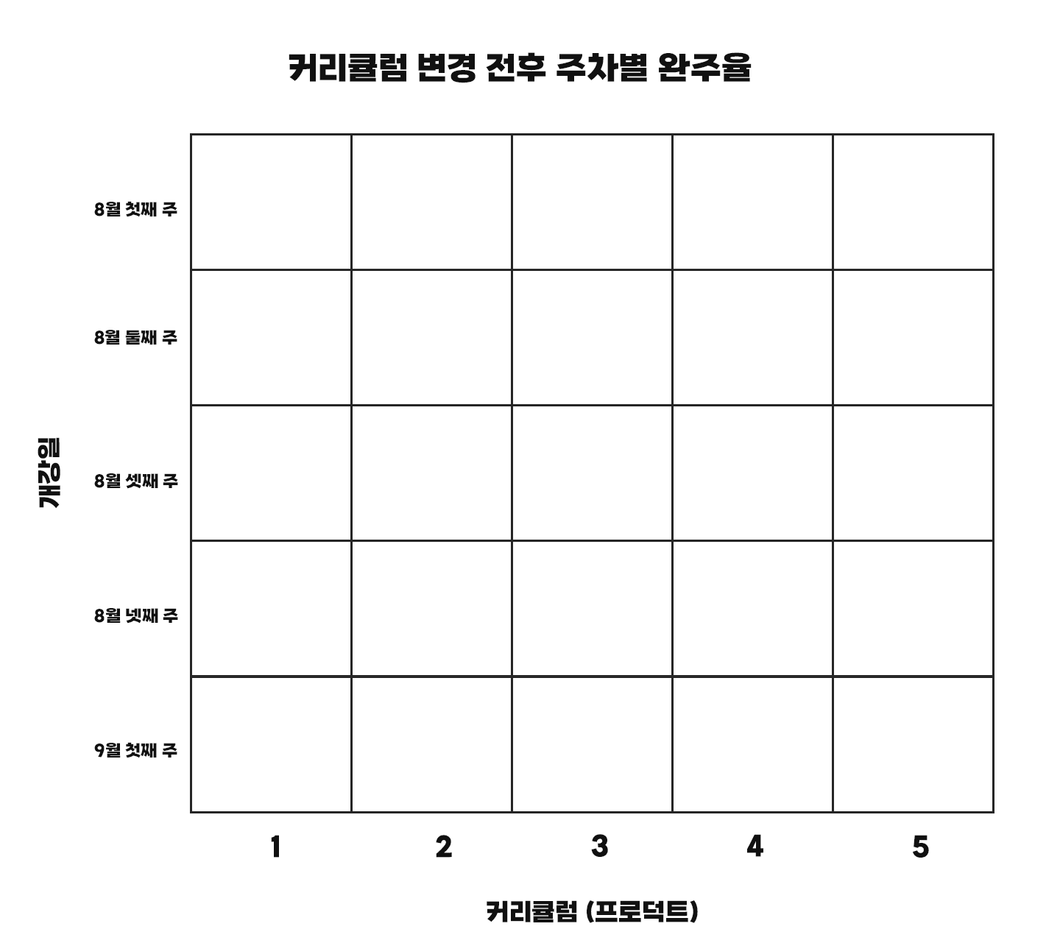

* 자, 우리가 확인하고 싶었던 것을 정리해볼까요?

1. 각 강의 주차별(no.) 완주율   
2. 각 개강일별 완주율   

**→ 위 두 개 요인에 모두 해당하는 부분을 위 그래프에서는 바로 판별할 수 있겠죠?**   

**[변동사항이 발생한 코호트 찾기]**

- 8월 둘째 주에 개강한 인원부터 바뀐 3주차(3번) 강의 콘텐츠를 듣게 되었습니다!
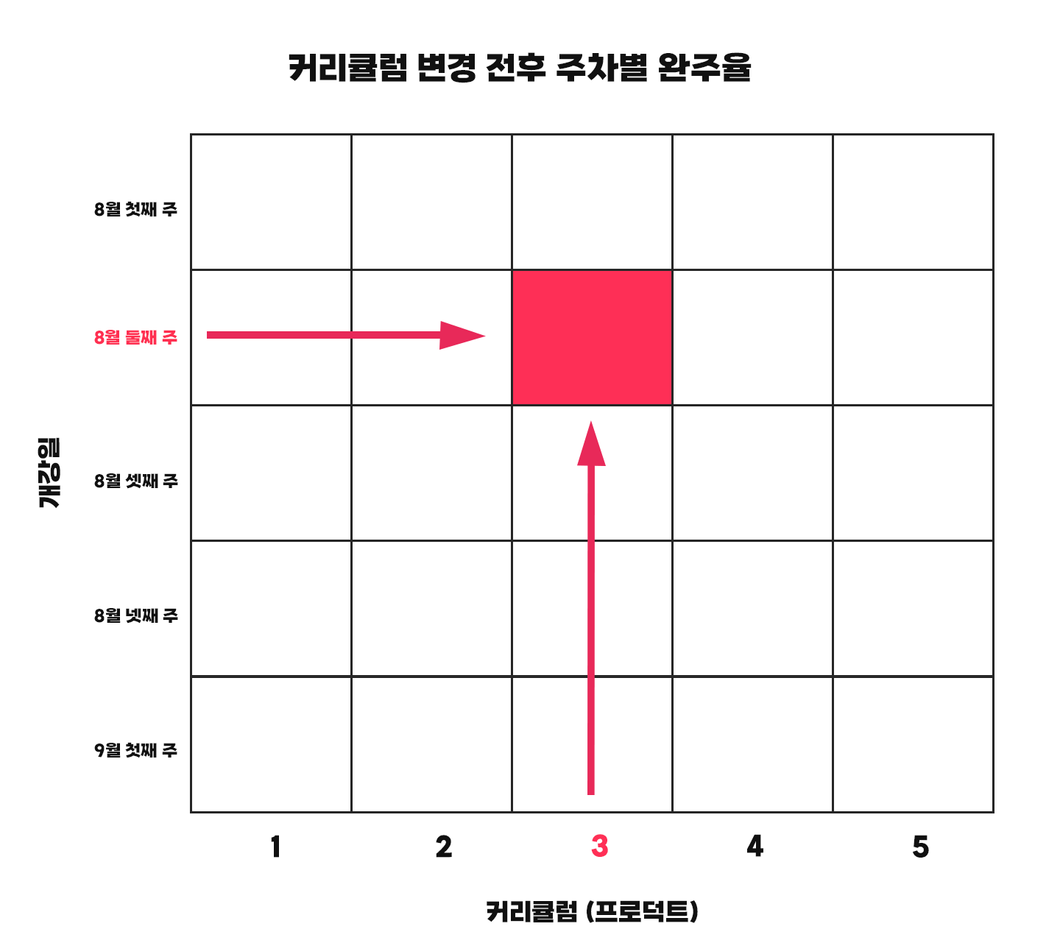

---

이제 구역이 나뉘어졌으니, 각 박스 안에 완주율을 쇽쇽 넣으면 완성입니당!

- 자, 그러면 수치에 따른 변화는 어떻게 한눈에 파악할 수 있을까요~?
* 수치는 색의 깊이로 차이를 나타낼 수 있답니다! 쨔잔!!
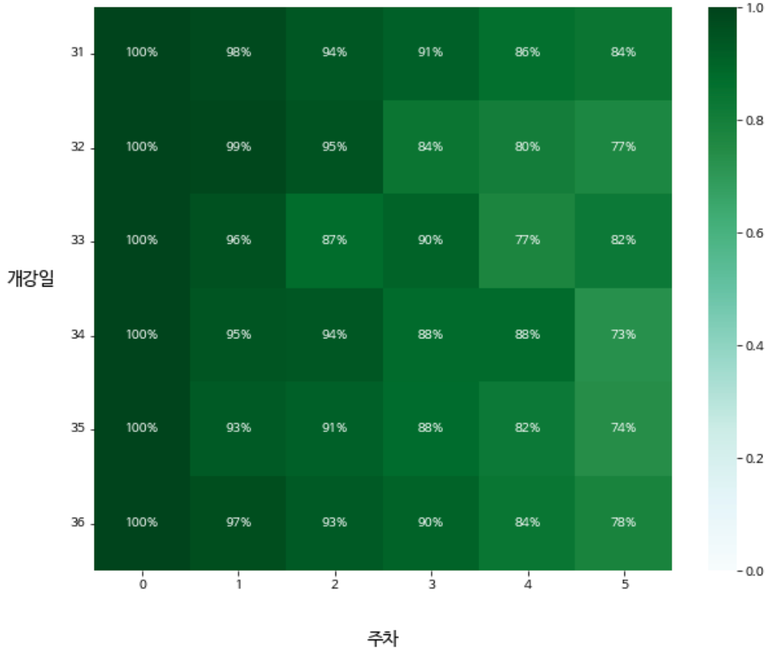

* - **이렇게 생긴 차트를 코호트 차트라고 부릅니다.** 😊   
이렇게 소비자를 시간의 흐름과 사용하는 서비스의 단계 등으로 나누어 
같은 성질의 집단으로 구분한 것을 코호트라고 하고,    
소비자의 전환율을 시간의 흐름과 서비스의 단계나 재사용 등 두 가지 요인을 복합적으로 보여줄 수 있는 차트를 코호트 차트라고 합니다!

### 요약
8월2주차경에 콘텐츠 개편이 있었다. 콘텐츠개편과 완주율은 연관이 있는가.

* 가설 : 8월 2주차부터 변경된 3주차(3번) 강의의 완주율이 현저히 떨어질 것이다.
* 검증방법 : 강의 주차(순서)와 개강일에 따른 완주율 코호트를 분석해보자

### 코호트 분석 방법 절차
**[코호트 분석 방법 뜯어보기]**
1. ~~가설 세우기~~
2. ~~데이터 가져오기~~
3. **데이터 전처리하기**
    * **데이터 로딩 및 결측치 제거 하기**
    * **필요한 데이터 가공하기**    
        1. 각 고객별 최초 수강 주(week) 구하기
        2. 진도율을 강의 주차(순서)로 변경 하기

4. **데이터 분석하기**
    *  수강 시작 주와, 수강 주차(순서)에 각 해당하는 수강생 수를 내용으로 테이블 만들기
    * 수강 주차(순서) 별, 수강한 총 인원 구하기
    
5. **데이터 시각화하기**
    * **고객 수강 유지율을 알수 있는 피벗 테이블 구하기**
        1. 아래 세 가지를 한 눈에 볼 수 있는 피벗테이블 구하기 

            행 →  수강 시작 주차 

            열 →  수강 주차(순서)

            행과 열사이의 정보 → 수업을 들은 수강생 수

        2.  각 수강 시작 주(week)당 초기 고객 수 구하기
        3.  피벗테이블의 각 데이터를 초기 고객수로 나눠서, 퍼센테이지로 나타내기
    
    (2) **히트맵으로 특정 기간동안 고객의 수강율 나타내기**
    
6. 결론 도출하기
</aside>

## 데이터 로드 및 살펴보기
* cohort_data.csv
```
`user_id`: 수강생 고유 id
`created_at`: 수강 등록 시점
`name`:  수강생 이름
`progress_rate`: 진도율
```

In [61]:
import pandas as pd

In [62]:
cohort_data = pd.read_table('data/cohort_data.csv',sep=',')
cohort_data.head()

,created_at,user_id,name,progress_rate
0,2022. 8. 15,237a15a4c854a19f,이시우,100
1,2022. 8. 8,9e39ebcdb3e41fdb,경서희,100
2,2022. 8. 8,ccd9564adf22a5f7,지소희,36
3,2022. 8. 1,291ad78f3adfa9ee,최가은,100
4,2022. 8. 22,dfa8afb8ada36a4a,설서영,100


In [63]:
cohort_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     1736 non-null   object
 1   user_id        1736 non-null   object
 2   name           1736 non-null   object
 3   progress_rate  1736 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 54.4+ KB


In [64]:
cohort_data.describe(include='all')

,created_at,user_id,name,progress_rate
count,1736,1736,1736,1736.000000
unique,6,1736,1301,NaN
top,2022. 8. 8,237a15a4c854a19f,조서연,NaN
freq,344,1,5,NaN
mean,NaN,NaN,NaN,78.471198
std,NaN,NaN,NaN,32.127202
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,58.000000
50%,NaN,NaN,NaN,100.000000
75%,NaN,NaN,NaN,100.000000


* 어떤 부분을 확인해야 할까요~?
* 우리는 “수강 완료” 하는데, 얼마만큼 “걸린 시간”을 알아야 합니다!
```
`created_at`: 수강 등록 시점
`progress_rate`: 진도율
```

## 데이터 전처리
고객의 수강 시점을 “일(day)”에서 “주 단위(week)”로,   
그리고 각 수강생의 “진도율”을 “강의 주차(순서)”로 변경 해볼꺼예요!   
* 선생님.. 아니 왜 이 과정을 거치나요?   
⇒ 일(day)로 데이터를 분석 한다면, TMI 너무 많은 정보로, 결과를 한 눈에 파악하기 힘들꺼예요!   
⇒ 우리는 진도율을 아는게 아니라 강의 주차(순서) 별로 “수강 전환율”을 알고 싶기에, 그 진도에 해당하는 “주차(순서)”의 정보도 필요하죠!

### step 1) 각 고객별 최초 수강 주(week) 구하기
“년, 월, 일”로 이루어 진 것을 1년 중 “몇주차” 에 있는지 나타내 봅시다!

In [65]:
# 날짜 데이터 타입 확인하기
type(cohort_data['created_at'][0])

str

In [66]:
# 데이터 타임 객체로 변환하기
# format='%Y-%m-%dT%H:%M:%S.%f'
cohort_data['start_time'] = pd.to_datetime(cohort_data['created_at'], format='mixed')
cohort_data.tail()

,created_at,user_id,name,progress_rate,start_time
1731,2022. 8. 22,223c84b864342521,예채원,100,2022-08-22
1732,2022. 8. 22,8f9795f7fb32495b,하준희,100,2022-08-22
1733,2022. 9. 6,5642de61e1a3711e,추민준,53,2022-09-06
1734,2022. 8. 15,5f29bdba68615d6a,옥건,100,2022-08-15
1735,2022. 8. 15,24d978f6429a5af4,안유림,100,2022-08-15


In [100]:
type(cohort_data['start_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [67]:
#수강 시작 주(기수) 구하고, 테이블의 열로 추가 하기
cohort_data['start_week(usr_grp)']= cohort_data['start_time'].dt.isocalendar().week
cohort_data.tail()
#  .dt.isocalendar().week ⇒ 날짜를 주(week) 로 변경 할수 있습니다. 

,created_at,user_id,name,progress_rate,start_time,start_week(usr_grp)
1731,2022. 8. 22,223c84b864342521,예채원,100,2022-08-22,34
1732,2022. 8. 22,8f9795f7fb32495b,하준희,100,2022-08-22,34
1733,2022. 9. 6,5642de61e1a3711e,추민준,53,2022-09-06,36
1734,2022. 8. 15,5f29bdba68615d6a,옥건,100,2022-08-15,33
1735,2022. 8. 15,24d978f6429a5af4,안유림,100,2022-08-15,33


In [68]:
# 처음 수강 시작한 주 범위 확인 하기
#이전에 배웠듯이 set()은 set안의 데이터는 순서가 정해져있지 않고, 중복되지 않는 고유한 요소를 가져옵니다!
category_range = set(cohort_data['start_week(usr_grp)'])
category_range

{31, 32, 33, 34, 35, 36}

### step 2) 진도율을 강의 주차(콘텐츠 순서)로 변경 하기
현재 우리게 주어진 건 수강율입니다!
하지만, **특정 수강생이 “강의 어느 주차(콘텐츠 순서)”에 있는지 아는것**이 중요하죠!   
수강율을 수강 주차(순서)로 변경 시켜 봅시다!

1. 진도율을 강의 주차(순서)로 변경 하기
    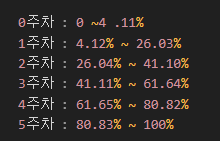
2. 범주화 할 데이터 리스트로 만들기
3. 범주를 구분하는 기준 및 라벨(수강 주차(순서)) 만들기
4. 진도율에 따라 주차(순서)별로 변경하기
5. 기존 테이블에 현재 수강 주차(순서) 테이블 합치기 
6. 테이블 컬럼 이름 변경 하기

In [69]:
# 2. 범주화할 데이터 리스트 만들기
progress_rate = list(cohort_data['progress_rate'])
progress_rate[:10]

[100, 100, 36, 100, 100, 100, 71, 55, 67, 100]

In [70]:
# 3. 범주를 구분하는 기준 및 라벨(수강 주차(콘텐츠순서)) 만들기
#범주를 구분하는 기준 bins 처음(0)과 끝(100) 잊지 말고 기입 해주세요!
bins = [0, 4.11, 26.03, 41.10, 61.64, 80.82, 100]
#구분한 범주의 라벨 labels
labels=[0,1,2,3,4,5]

In [71]:
# 4. 진도율에 따라 주차(콘텐츠 순서)별로 변경하기
# 범주화 하기 pd.cut
cuts = pd.cut(progress_rate, bins, right=True, include_lowest=True, labels=labels)
cuts

[5, 5, 2, 5, 5, ..., 5, 5, 3, 5, 5]
Length: 1736
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [72]:
#범주화 결과물을 테이블로 변경하기
cuts = pd.DataFrame(cuts)
cuts.tail()

,0
1731,5
1732,5
1733,3
1734,5
1735,5


In [73]:
# 기존 테이블에 현재 수강 주차(순서) 테이블 합치기 
# concat() 함수를 이용하여, cohort_data 테이블과, cuts 테이블 병합 할수 있습니다 :)
cohort_data = pd.concat([cohort_data, cuts],axis=1, join='inner')
cohort_data.head()

,created_at,user_id,name,progress_rate,start_time,start_week(usr_grp),0
0,2022. 8. 15,237a15a4c854a19f,이시우,100,2022-08-15,33,5
1,2022. 8. 8,9e39ebcdb3e41fdb,경서희,100,2022-08-08,32,5
2,2022. 8. 8,ccd9564adf22a5f7,지소희,36,2022-08-08,32,2
3,2022. 8. 1,291ad78f3adfa9ee,최가은,100,2022-08-01,31,5
4,2022. 8. 22,dfa8afb8ada36a4a,설서영,100,2022-08-22,34,5


In [74]:
# 수강 주차(순서)의 컬럼 이름 변경하기
cohort_data.columns[6]="week(con_no)"
#6번째의 컬럼의 이름만 "weeks" 변경 해주면 되겠죠? 하지만 이렇게 작성하면 오류가 발생 할꺼예요!

TypeError: Index does not support mutable operations

In [110]:
#그래서, 귀찮더라도, 우리가 원하는 컬럼의 이름을 다 작성해 줍시다!
cohort_data.columns=['created_at','user_id','name','progress_rate','start_time','start_week(usr_grp)',"week(con_no)"]
cohort_data

,created_at,user_id,name,progress_rate,start_time,start_week(usr_grp),week(con_no)
0,2022. 8. 15,237a15a4c854a19f,이시우,100,2022-08-15,33,5
1,2022. 8. 8,9e39ebcdb3e41fdb,경서희,100,2022-08-08,32,5
2,2022. 8. 8,ccd9564adf22a5f7,지소희,36,2022-08-08,32,2
3,2022. 8. 1,291ad78f3adfa9ee,최가은,100,2022-08-01,31,5
4,2022. 8. 22,dfa8afb8ada36a4a,설서영,100,2022-08-22,34,5
...,...,...,...,...,...,...,...
1731,2022. 8. 22,223c84b864342521,예채원,100,2022-08-22,34,5
1732,2022. 8. 22,8f9795f7fb32495b,하준희,100,2022-08-22,34,5
1733,2022. 9. 6,5642de61e1a3711e,추민준,53,2022-09-06,36,3
1734,2022. 8. 15,5f29bdba68615d6a,옥건,100,2022-08-15,33,5


## 데이터 분석

In [111]:
# step 1) 수강 시작 주(기수)와, 수강 주차(순서)를 기준으로 테이블 만들기
grouping = cohort_data.groupby(['start_week(usr_grp)',"week(con_no)"])
grouping

In [112]:
pd.Series.nunique?

Signature: pd.Series.nunique(self, dropna: 'bool' = True) -> 'int'
Docstring:
Return number of unique elements in the object.

Excludes NA values by default.

Parameters
----------
dropna : bool, default True
    Don't include NaN in the count.

Returns
-------
int

See Also
--------
DataFrame.nunique: Method nunique for DataFrame.
Series.count: Count non-NA/null observations in the Series.

Examples
--------
>>> s = pd.Series([1, 3, 5, 7, 7])
>>> s
0    1
1    3
2    5
3    7
4    7
dtype: int64

>>> s.nunique()
4
File:      c:\users\maeng\anaconda3\lib\site-packages\pandas\core\base.py
Type:      function

In [113]:
# step 2) 수강 시작 주와, 수강 주차에 각 해당하는 수강생 수 구하고, 테이블로 변경하기 
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = pd.DataFrame(cohort_data)
cohort_data.head(6)

user_id
start_week(usr_grp) week(con_no)         
31                  0                   5
                    1                  14
                    2                  14
                    3                  16
                    4                  14
                    5                 167

In [114]:
cohort_data.at?

Type:        property
String form: <property object at 0x000002AC99022FC0>
Docstring:  
Access a single value for a row/column label pair.

Similar to ``loc``, in that both provide label-based lookups. Use
``at`` if you only need to get or set a single value in a DataFrame
or Series.

Raises
------
KeyError
    * If getting a value and 'label' does not exist in a DataFrame or
        Series.
ValueError
    * If row/column label pair is not a tuple or if any label from
        the pair is not a scalar for DataFrame.
    * If label is list-like (*excluding* NamedTuple) for Series.

See Also
--------
DataFrame.at : Access a single value for a row/column pair by label.
DataFrame.iat : Access a single value for a row/column pair by integer
    position.
DataFrame.loc : Access a group of rows and columns by label(s).
DataFrame.iloc : Access a group of rows and columns by integer
    position(s).
Series.at : Access a single value by label.
Series.iat : Access a single value by integer positio

In [115]:
cohort_data.at[ (31,3) , 'user_id' ]

16

In [116]:
cohort_data.loc[ (31,3) , 'user_id' ]

16

In [117]:
# step 3) 수강 주차 별, 수강한 총 인원 구하기
# ⇒ 각 주차별로 머물러 있는 수강생 수는 구했지만,
# 우리에게 필요한 것은 수강 주차별 수강을 '완료'한 총 인원 입니다!  (누적합)

#첫 주가 31주니 변수를 하나 만들어 줍니다!
f = 31

#처음 수강 시작한 주의 범위가 {31,32,33,34,35,36} 이니, range(6)으로 합시다!
for i in range(6):
	#5주차의 강의가 마지막이고, 0주차까지 이니, 시작은 5에서 시작해 1씩 0까지 감소 시킬수 있어요!
  for j in range(5, 0, -1):
    # at함수 : 테이블의 하나의 요소에 접근 할수 있습니다 .
    cohort_data.at[ (f, j-1) , 'user_id'] = int(cohort_data.at[(f,j),'user_id']) +  int(cohort_data.at[(f,j-1),'user_id'])
	#주차는(31부터 32 33..) 1씩 늘어나죠?
  f = f + 1

In [118]:
# step4) cohort_data에 인덱스 설정하기  
cohort_data = cohort_data.reset_index()
cohort_data.head()

,start_week(usr_grp),week(con_no),user_id
0,31,0,230
1,31,1,225
2,31,2,211
3,31,3,197
4,31,4,181


## 데이터 시각화
* 이번 시각화 에서는 분석한 데이터를 그래프로 나타내기 위해서
분석한 데이터 테이블을 좀 더 가시화 하는 과정까지 거칠거예요!

### step 1) 피벗 테이블 만들기
피벗 테이블이란, 기존의 데이터를 바탕으로 필드를 재구성해, 
데이터 통계를 보다 쉽게 파악 할수 있도록 만든 테이블 입니다.
* 왜 만들어야 하나요?
    * 데이터 분석 결과를 한눈에 볼수 있어요!
    *  우리가 만든 테이블로는 수강 시작 주당 수강 주차별 인원을 한눈에 파악하기 힘듭니다.
    * 하지만 피벗테이블로, 우리가 원하는 열과 행으로 데이터를 다시 한번 재구성하면 한 눈에 데이터 내용을 파악할 수 있겠죠-?
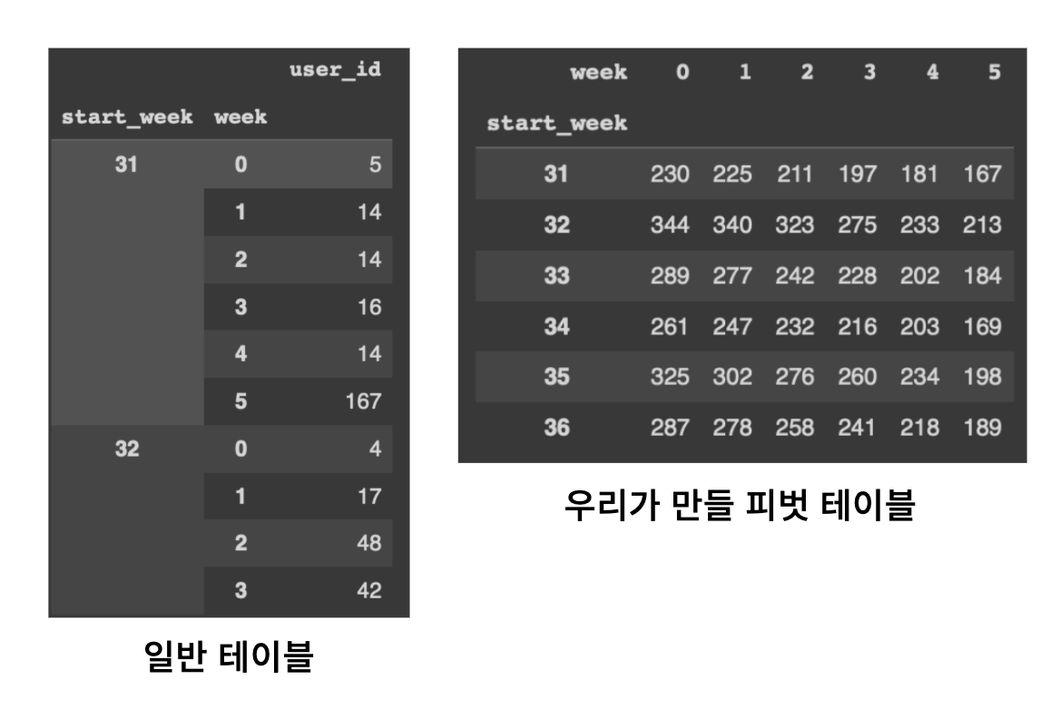

In [119]:
# 피벗테이블 만들기
cohort_counts = cohort_data.pivot(index="start_week(usr_grp)",
                                  columns="week(con_no)",
                                  values="user_id")
cohort_counts

week(con_no),0,1,2,3,4,5
start_week(usr_grp),,,,,,
31,230,225,211,197,181,167
32,344,340,323,275,233,213
33,289,277,242,228,202,184
34,261,247,232,216,203,169
35,325,302,276,260,234,198
36,287,278,258,241,218,189


### step 2) 좀 더 가시화 시키기! 표의 데이터를 퍼센테이지로 나타내 봅시다! 
- 수강 총 인원을 퍼센테이지로 변경한 테이블이 필요한 이유
    * 우리가 고객의 “수”로 고객 수강 이탈을 판단하는건 쉽지 않아요! 
    * 개강일별로 전체 인원이 모두 다르기 때문입니다!
    * 그래서, 고객의 행동이 얼만큼 변화가 있는지에 대한 부분을 비율로 나타내면  좀 더 한 눈에 알아 볼수 있는 분석 결과가 됩니다!
    + 이것을 **리텐션 테이블**이라고 합니다\
> 리텐션이란? 
고객이 우리 제품이나 서비스를 지속적으로 소비하는 것을 의미 합니다!    
그러니 이것을 수치화해 기간을 나눠 테이블로 나타내면 지속적으로 고객이 우리의 서비스를 사용하는지 여부를 쉽게 알 수 있겠죠

In [120]:
# 리텐션 테이블 생성 및 각 데이터에 나눠 줄 수강 시작 주 총 인원 구하기
# 수강 첫 주 총 인원 구하기

# 앞서 만든 피벗 테이블을 retention 변수에 저장하기
retention = cohort_counts

#각 주(week) 별 최초 수강생 수만 가져오기 (나눠줄때, 분모가 되는 부분!)
cohort_sizes = cohort_counts.iloc[:, 0]
cohort_sizes

start_week(usr_grp)
31    230
32    344
33    289
34    261
35    325
36    287
Name: 0, dtype: int64

In [121]:
#  각 데이터에 수강 시작 주의 총 인원 나눠주기
# 표의 단일 데이터에 최초 수강생의 수를 나누어, 각 주당 수강생 수강율 나타내기! 
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

week(con_no),0,1,2,3,4,5
start_week(usr_grp),,,,,,
31,1.0,0.978261,0.917391,0.856522,0.786957,0.726087
32,1.0,0.988372,0.938953,0.799419,0.677326,0.619186
33,1.0,0.958478,0.837370,0.788927,0.698962,0.636678
34,1.0,0.946360,0.888889,0.827586,0.777778,0.647510
35,1.0,0.929231,0.849231,0.800000,0.720000,0.609231


In [122]:
#각 수치 퍼센트로 변경하기
#round 함수로 3자리 수에서 반올림 한 후, 100을 곱해 줍니다!
retention.round(3)*100

week(con_no),0,1,2,3,4,5
start_week(usr_grp),,,,,,
31,100.0,97.8,91.7,85.7,78.7,72.6
32,100.0,98.8,93.9,79.9,67.7,61.9
33,100.0,95.8,83.7,78.9,69.9,63.7
34,100.0,94.6,88.9,82.8,77.8,64.8
35,100.0,92.9,84.9,80.0,72.0,60.9
36,100.0,96.9,89.9,84.0,76.0,65.9


### step 3) 코호트 분석 히트맵으로 시각화 하기
- 왜 히트맵을 사용 할까요?
    * 히트맵을 사용하면, 두 개의 카테고리 값에 대한 값 변화를 한눈에 알아보기 쉽기 때문 입니다.
    * 히트맵을 사용하려면, 우선 seaborn 라이브러리가 필요합니다.

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

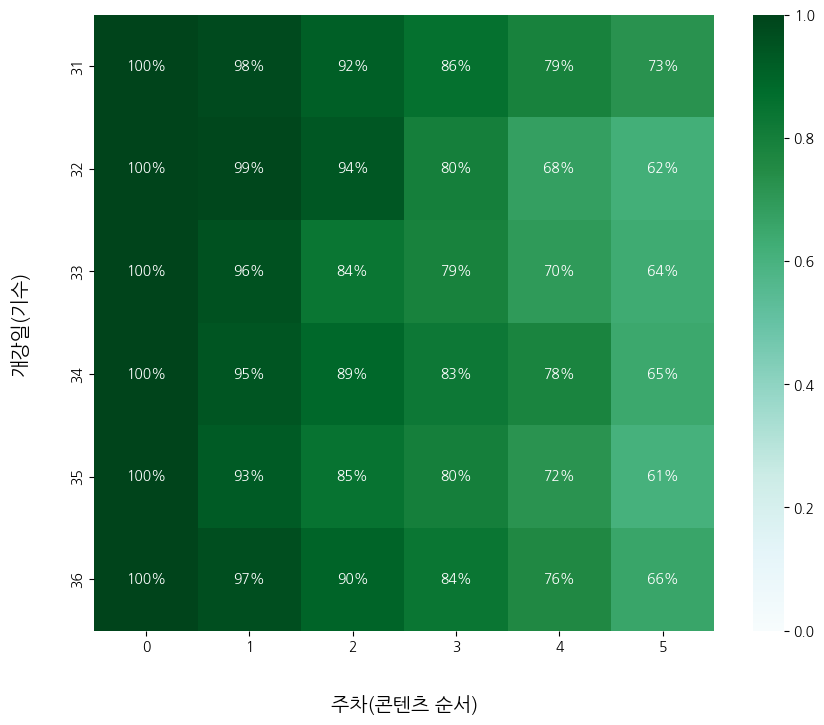

In [124]:
import seaborn as sns
#테이블 크기 설정 하기
plt.figure(figsize=(10,8))

sns.heatmap(data= retention,
           annot=True, #각 cell의 데이터 표기 유무를 나타냅니다!
           fmt='.0%', #values(데이터의 값) 값의 소수점 표기
           vmin=0,# 색범위 최소값 설정
           vmax=1,# 색범위 최댓값 설정
           cmap="BuGn" #히트맵의 색을 설정합니다
						)

plt.xlabel('주차(콘텐츠 순서)', fontsize=14,labelpad=30)

plt.ylabel('개강일(기수)', fontsize=14,labelpad=30)
plt.yticks()

plt.show()

잠깐, “전환율”이기 때문에 3주차(3번)를 문제 없이 들은 사람만 4주차(4번)로 갔겠죠?   

그래서 저희는 4주차(4번)를 확인해야합니다.

## 분석 결과 추론

 3주차만 떨어지는 것이 아니라 모든 주차(콘텐츠)에서 자연적으로 감소 하는 것으로 보임, 다른 요인이 있을 것으로 추정
 
 ---
 **팀장님!**

**“지난 8월 둘째 주부터 시행한 3주차(3번) 강의 콘텐츠 변경 건이 
수강 완주율에 어떤 영향을** 주었는가” 에 대한 데이터 분석을 진행해보았는데요!

바꾸었던 3주차(3번) 전환을 나타내는

4주차(4번) 컬럼에서만 떨어진 것이 아니라 전체적으로 떨어진 것을 볼 수 있습니다!

추가적으로 4주차(4번) 칼럼이 일정하게 떨어져서 유지되고 있지도 않네요! 

다른 요인 때문에 완주율이 떨어졌다고 보는 것이 맞을 것 같습니다
>  프로덕트 개선은 정말 도움이 되었을까

## Quiz
 **방금 배운 코호트 차트를 조금 더 잘 보이게 만들어볼게요!**

모든 주차(콘텐츠 순서)가 같은 조건이면 떨어지는 구간만 색이 연해보이겠죠-? :)

**숙제 : 아래 그림의 오른쪽 차트와 같은 형태로 시각화 해봅시다-!**   

→ 왼쪽은 출발선이 같지 않으니 한번 더 생각이 필요하지만 오른쪽은 출발선이 같아서 문제 구간이 더 잘보입니다!
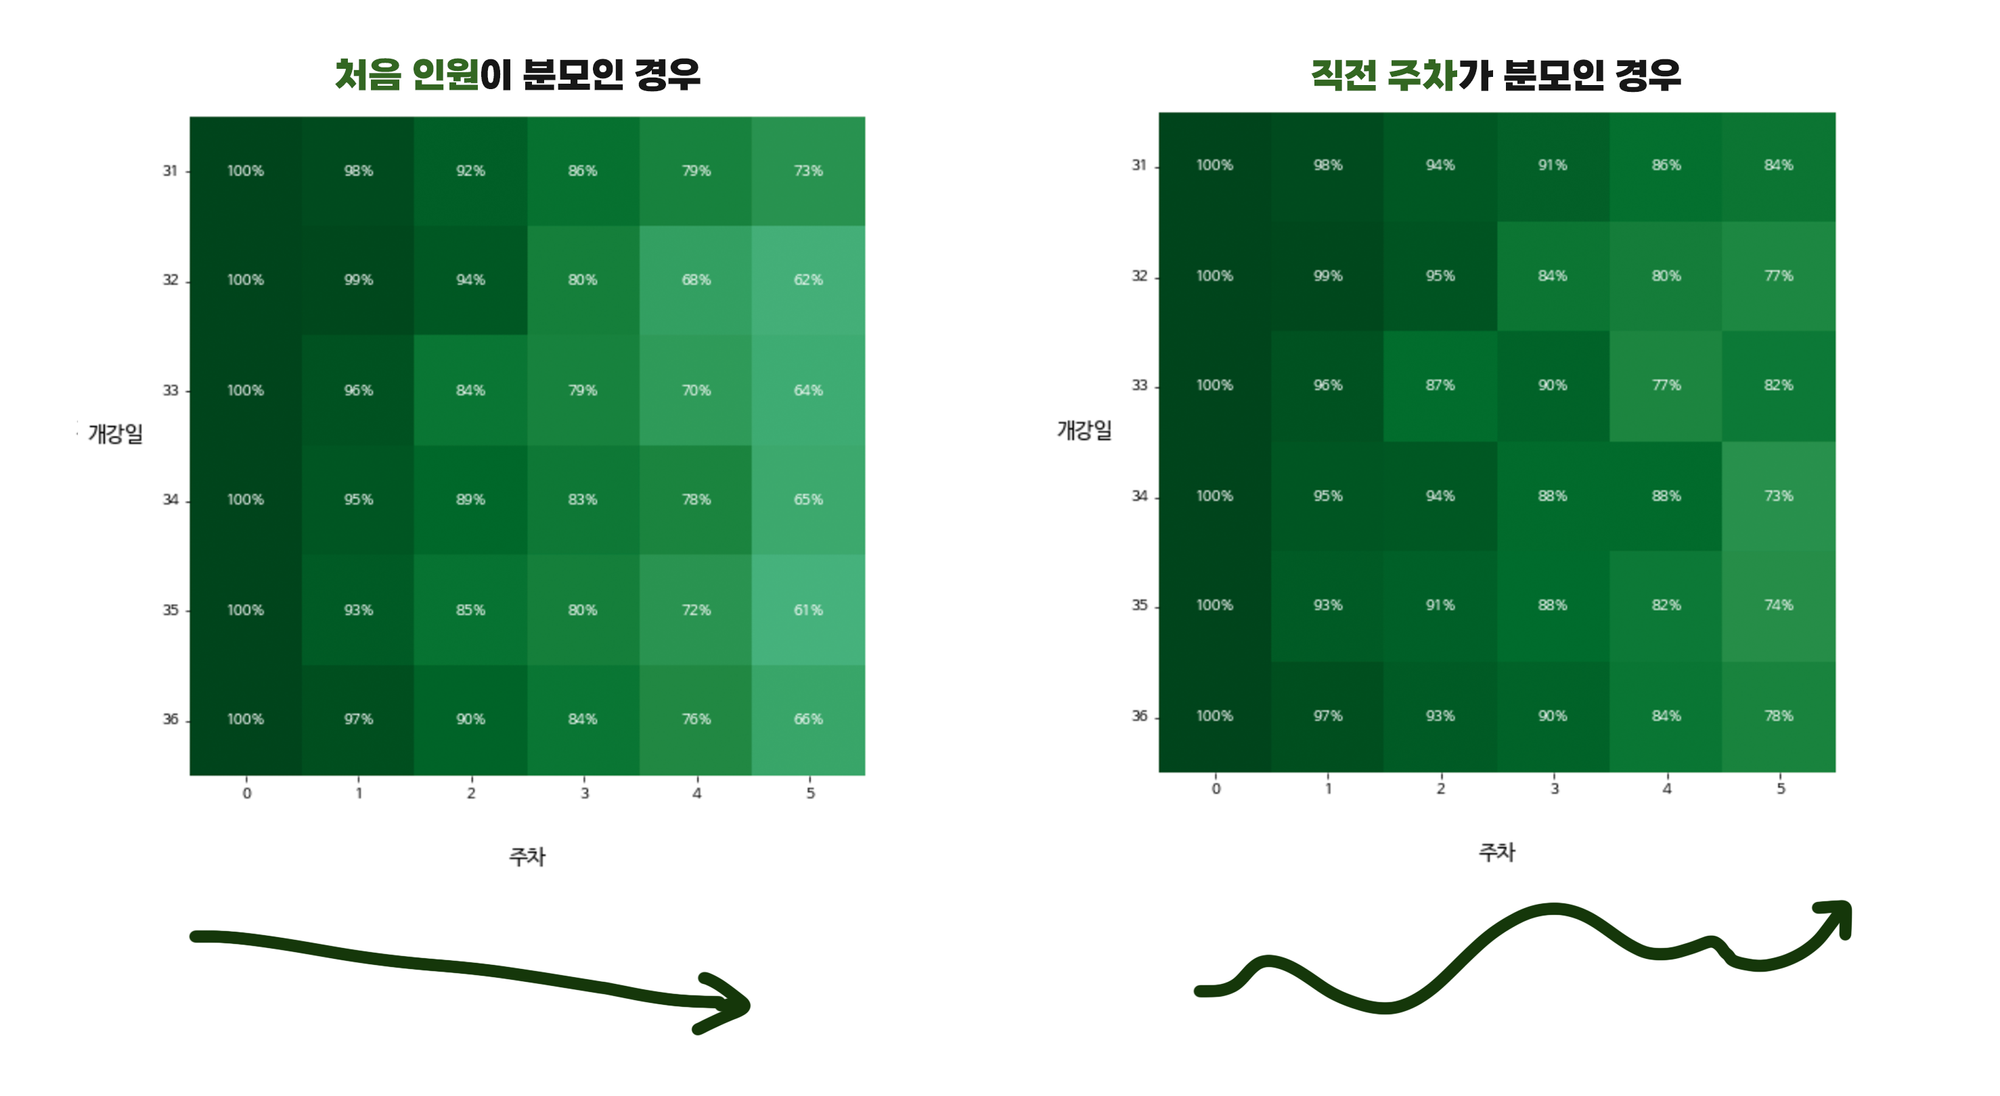

### 개강일별 주차(콘텐츠)간 전환율 구하기
앞에서는 구하고 싶은 '커리큘럼별 인원을 처음인원'으로 나누었다면   
이번에는 **구하고 싶은 커리큘럼별 인원을 직전주차(콘텐츠) 인원로 나누어** 개강일별 주차(콘텐츠) 간 전환율을 구할 수 있어요!
> 이미 퍼센트는 구했으니 **바로 각 커리큘럼별 전환율을 직전주차(콘텐츠) 전환율로 나누면 된답니다!**

In [125]:
cohort_data = pd.read_table('data/cohort_data.csv',sep=',')

#날짜 데이터 타입 변경
cohort_data['start_time'] = pd.to_datetime(cohort_data['created_at'], format='mixed')

#시작 week 구하기
cohort_data['start_week']= cohort_data['start_time'].dt.isocalendar().week

#시작 주 범위 알기
category_range = set(cohort_data['start_week'])

# 범주화 하기
progress_rate = list(cohort_data['progress_rate'])

#범주를 구분하는 기준 bins
bins = [0,4.11,26.03,41.10,61.64,80.82,100]

#구분한 범주의 라벨 labels
labes=[0,1,2,3,4,5]

#범주화에 사용하는 함수 pd.cut
cuts = pd.cut(progress_rate,bins, right=True,include_lowest=True, labels=labes)
cuts = pd.DataFrame(cuts)

# 표 합치기
cohort_data = pd.concat([cohort_data,cuts],axis=1, join='inner')

#표 인덱스 변경하기
cohort_data.columns=['created_at','user_id','name','progress_rate','start_time','start_week(usr_grp)',"week(con_no)"]

#시작주와, 수강 주차별 기준으로 표 grouping 하기
grouping = cohort_data.groupby(['start_week(usr_grp)',"week(con_no)"])

#시작주와, 수강 주차별에 해당하는 수강생 수 구하기
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = pd.DataFrame(cohort_data)

#각 주차별 수강한 수강생 총 합 구하기
k=31
for i in range(6):
  for j in range(5, 0, -1):
    cohort_data.at[(k,j-1), 'user_id'] = int(cohort_data.at[(k,j),'user_id']) +  int(cohort_data.at[(k,j-1),'user_id'])
  k=k+1
cohort_data = cohort_data.reset_index()
cohort_data.head()


cohort_counts = cohort_data.pivot(index="start_week(usr_grp)",
                                  columns="week(con_no)",
                                  values="user_id")

# 앞서 만든 피벗 테이블을 retention 변수에 저장하기
retention = cohort_counts
#각 주(week) 별 최초 수강생 수만 가져오기
cohort_sizes = cohort_counts.iloc[:,0]


# 최초 수강생 수를 각 데이터에 나눠주기
retention = cohort_counts.divide(cohort_sizes, axis=0)

#각 수치 퍼센트로 변경하기
retention.round(3)*100

week(con_no),0,1,2,3,4,5
start_week(usr_grp),,,,,,
31,100.0,97.8,91.7,85.7,78.7,72.6
32,100.0,98.8,93.9,79.9,67.7,61.9
33,100.0,95.8,83.7,78.9,69.9,63.7
34,100.0,94.6,88.9,82.8,77.8,64.8
35,100.0,92.9,84.9,80.0,72.0,60.9
36,100.0,96.9,89.9,84.0,76.0,65.9


In [126]:
# 1) 주차 간 전환율 리텐션 테이블 만들기
#첫 시작주가 31주이죠!
w=31
#36주까지 있으니, for 구문의 range를 6으로 둡시다
for i in range(6):
	#각 시작 주차별 수강 주차는 총 0부터 5까지의 범위가 있죠? 그래서 range(1, 6, 1)로 설정합니다. 1부터 시작하여, 5까지 1씩 커진다는 뜻 입니다!
    for j in range(5, 1, -1):
        retention.at[(w,j)] = retention.at[(w,j)] / retention.at[(w,j-1)]
    w = w+1

retention

week(con_no),0,1,2,3,4,5
start_week(usr_grp),,,,,,
31,1.0,0.978261,0.937778,0.933649,0.918782,0.922652
32,1.0,0.988372,0.950000,0.851393,0.847273,0.914163
33,1.0,0.958478,0.873646,0.942149,0.885965,0.910891
34,1.0,0.946360,0.939271,0.931034,0.939815,0.832512
35,1.0,0.929231,0.913907,0.942029,0.900000,0.846154
36,1.0,0.968641,0.928058,0.934109,0.904564,0.866972


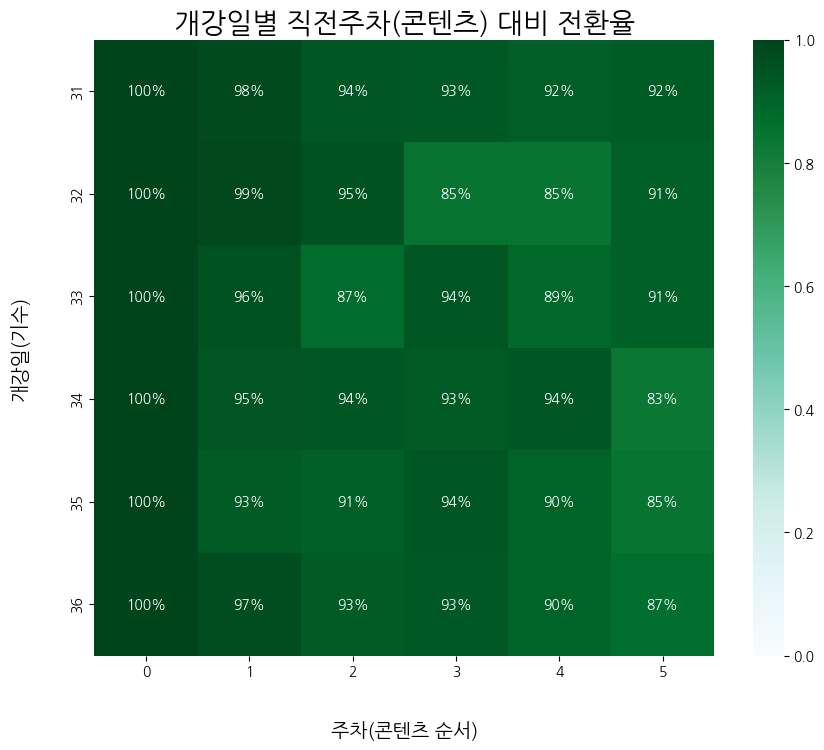

In [127]:
# 2) 주차 간 전환율 그래프로 나타내기
plt.figure(figsize=(10,8))

sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0,
           vmax=1,
           cmap="BuGn")


plt.xlabel('주차(콘텐츠 순서)', fontsize=14,labelpad=30)
plt.title('개강일별 직전주차(콘텐츠) 대비 전환율', fontsize=20)
plt.ylabel('개강일(기수)', fontsize=14,labelpad=30)
plt.yticks()

plt.show()

#### 비율/비율로 계산해도 될까?
- 분모가 동일하기 때문에 수치/수치 로 계산 결과와 동일하다.

In [128]:
cohort_counts

week(con_no),0,1,2,3,4,5
start_week(usr_grp),,,,,,
31,230,225,211,197,181,167
32,344,340,323,275,233,213
33,289,277,242,228,202,184
34,261,247,232,216,203,169
35,325,302,276,260,234,198
36,287,278,258,241,218,189


In [129]:
# 1) 주차 간 전환율 리텐션 테이블 만들기
#첫 시작주가 31주이죠!
w=31
#36주까지 있으니, for 구문의 range를 6으로 둡시다
for i in range(6):
	#각 시작 주차별 수강 주차는 총 0부터 5까지의 범위가 있죠? 그래서 range(1, 6, 1)로 설정합니다. 1부터 시작하여, 5까지 1씩 커진다는 뜻 입니다!
    for j in range(5, 1, -1):
        retention.at[(w,j)] = cohort_counts.at[(w,j)] / cohort_counts.at[(w,j-1)]
    w = w+1

retention

week(con_no),0,1,2,3,4,5
start_week(usr_grp),,,,,,
31,1.0,0.978261,0.937778,0.933649,0.918782,0.922652
32,1.0,0.988372,0.950000,0.851393,0.847273,0.914163
33,1.0,0.958478,0.873646,0.942149,0.885965,0.910891
34,1.0,0.946360,0.939271,0.931034,0.939815,0.832512
35,1.0,0.929231,0.913907,0.942029,0.900000,0.846154
36,1.0,0.968641,0.928058,0.934109,0.904564,0.866972


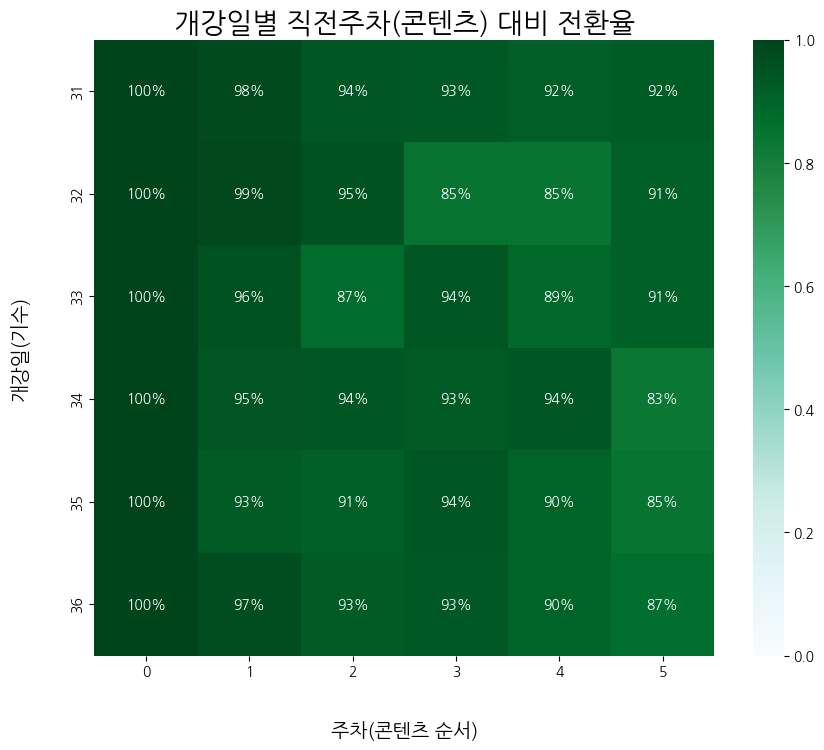

In [130]:
# 2) 주차 간 전환율 그래프로 나타내기
plt.figure(figsize=(10,8))

sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0,
           vmax=1,
           cmap="BuGn")


plt.xlabel('주차(콘텐츠 순서)', fontsize=14,labelpad=30)
plt.title('개강일별 직전주차(콘텐츠) 대비 전환율', fontsize=20)
plt.ylabel('개강일(기수)', fontsize=14,labelpad=30)
plt.yticks()

plt.show()